In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [9]:
#ARRAY*********
x=pd.array([1,2,3,4,5,6])
type(x)

pandas.core.arrays.integer.IntegerArray

In [10]:
x=pd.array(["hello","how are you"])
type(x)

pandas.core.arrays.string_.StringArray

In [11]:
x=pd.array(["hello",4])
type(x)

pandas.core.arrays.numpy_.PandasArray

In [15]:
x=pd.array([1,2,3,4,5,6])
y=pd.array([7,8,9,10,11,12])
x+y

<IntegerArray>
[8, 10, 12, 14, 16, 18]
Length: 6, dtype: Int64

In [16]:
x*y

<IntegerArray>
[7, 16, 27, 40, 55, 72]
Length: 6, dtype: Int64

In [17]:
x/y

array([0.14285714, 0.25      , 0.33333333, 0.4       , 0.45454545,
       0.5       ])

In [20]:
#BDATE*********
pd.bdate_range(start = '2000-01-01', end= '2010-12-31')
# or just
#pd.bdate_range('2000-01-01','2010-12-31')

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2010-12-20', '2010-12-21', '2010-12-22', '2010-12-23',
               '2010-12-24', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', length=2870, freq='B')

In [ ]:
pd.bdate_range('2000-01-01', periods =2)

In [31]:
pd.bdate_range('2000-01-01', periods =10,freq='5h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 05:00:00',
               '2000-01-01 10:00:00', '2000-01-01 15:00:00',
               '2000-01-01 20:00:00', '2000-01-02 01:00:00',
               '2000-01-02 06:00:00', '2000-01-02 11:00:00',
               '2000-01-02 16:00:00', '2000-01-02 21:00:00'],
              dtype='datetime64[ns]', freq='5H')

<module 'pandas.compat' from 'C:\\Users\\garyp\\anaconda3\\lib\\site-packages\\pandas\\compat\\__init__.py'>

In [88]:
#CONCAT*********
cals_eaten=pd.DataFrame({'Gary':[2400,2500,2700,2650,2600], 'Lauren':[1800,1400,1850,2000,2250]})

In [89]:
cals_burned=pd.DataFrame({'Gary':[3000,3100,3250,3100,3050], 'Lauren':[2000,2200,2650,2200,2100]})

In [90]:
#row/standard concat
pd.concat([cals_eaten,cals_burned])
# or  pd.concat([cals_eaten,cals_burned], axis=0)

,Gary,Lauren
0,2400,1800
1,2500,1400
2,2700,1850
3,2650,2000
4,2600,2250
0,3000,2000
1,3100,2200
2,3250,2650
3,3100,2200
4,3050,2100


In [91]:
#column concat
pd.concat([cals_eaten,cals_burned], axis=1)

,Gary,Lauren,Gary,Lauren
0,2400,1800,3000,2000
1,2500,1400,3100,2200
2,2700,1850,3250,2650
3,2650,2000,3100,2200
4,2600,2250,3050,2100


In [92]:
#ignore_index=true gets the numbers 0-9 instead of 0-4,0-4
pd.concat([cals_eaten,cals_burned], ignore_index=True)

,Gary,Lauren
0,2400,1800
1,2500,1400
2,2700,1850
3,2650,2000
4,2600,2250
5,3000,2000
6,3100,2200
7,3250,2650
8,3100,2200
9,3050,2100


In [108]:
x=pd.concat([cals_eaten,cals_burned],keys=['Eaten','Burned'],names=['Action','Day'])
x

Gary  Lauren
Action Day              
Eaten  0    2400    1800
       1    2500    1400
       2    2700    1850
       3    2650    2000
       4    2600    2250
Burned 0    3000    2000
       1    3100    2200
       2    3250    2650
       3    3100    2200
       4    3050    2100

In [109]:
x['Gary']

Action  Day
Eaten   0      2400
        1      2500
        2      2700
        3      2650
        4      2600
Burned  0      3000
        1      3100
        2      3250
        3      3100
        4      3050
Name: Gary, dtype: int64

In [110]:
x['Gary']['Burned']

Day
0    3000
1    3100
2    3250
3    3100
4    3050
Name: Gary, dtype: int64

In [111]:
x['Gary']['Burned'][2]

3250

In [125]:
#CROSSTAB*********
a=np.array(['x','x','x','x','x','x','y','y','y','y','y','y'])
b=np.array([1,2,3,4,5,1,2,3,4,5,1,2])

In [126]:
pd.crosstab(a,b)

col_0,1,2,3,4,5
row_0,,,,,
x,2,1,1,1,1
y,1,2,1,1,1


In [129]:
#aggfunc can have mean, sum, count
pd.crosstab(a,b,rownames=['Letters'],colnames=['Numbers'],values=b,aggfunc='sum')

numbers,1,2,3,4,5
letters,,,,,
x,2,2,3,4,5
y,1,4,3,4,5


In [137]:
#3 dimension case
a=np.array(['x','x','x','x','x','x','y','y','y','y','y','y'])
b=np.array([1,2,3,4,5,1,2,3,4,5,1,2])
c=np.array(['Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren'])

In [142]:
#Note you can do crosstab(a,b,c) so have to choose one as your double index, EG a,[b,c]
pd.crosstab(a,[b,c],rownames = ['Letters'],colnames=['Numbers','Person'])

Numbers    1           2           3           4           5       
Person  Gary Lauren Gary Lauren Gary Lauren Gary Lauren Gary Lauren
Letters                                                            
x          1      1    0      1    1      0    0      1    1      0
y          1      0    1      1    0      1    1      0    0      1

In [144]:
# another way
pd.crosstab([a,b],c,rownames = ['Letters','Numbers'],colnames=['Person'])

Person           Gary  Lauren
Letters Numbers              
x       1           1       1
        2           0       1
        3           1       0
        4           0       1
        5           1       0
y       1           1       0
        2           1       1
        3           0       1
        4           1       0
        5           0       1

In [150]:
a=np.array([10,10,10,10,10,10,10,10,20,20,20,20,30,30,30,30,30,40,40,40,40,40,50,50,50,50,50,50,60,60,60,60])
b=np.array(['Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren','Gary','Lauren'])

In [151]:
pd.crosstab(a,b)

col_0,Gary,Lauren
row_0,,
10,4,4
20,2,2
30,3,2
40,2,3
50,3,3
60,2,2


In [152]:
pd.crosstab(a,b,normalize=True)
#or pd.crosstab(a,b,normalize='all')

col_0,Gary,Lauren
row_0,,
10,0.12500,0.12500
20,0.06250,0.06250
30,0.09375,0.06250
40,0.06250,0.09375
50,0.09375,0.09375
60,0.06250,0.06250


In [155]:
pd.crosstab(a,b,normalize='index')

col_0,Gary,Lauren
row_0,,
10,0.5,0.5
20,0.5,0.5
30,0.6,0.4
40,0.4,0.6
50,0.5,0.5
60,0.5,0.5


In [156]:
pd.crosstab(a,b,normalize='columns')

col_0,Gary,Lauren
row_0,,
10,0.2500,0.2500
20,0.1250,0.1250
30,0.1875,0.1250
40,0.1250,0.1875
50,0.1875,0.1875
60,0.1250,0.1250


In [168]:
#CUT*********
a=np.array([0,5,20,30])
pd.cut(a,bins=5)

[(-0.03, 6.0], (-0.03, 6.0], (18.0, 24.0], (24.0, 30.0]]
Categories (5, interval[float64]): [(-0.03, 6.0] < (6.0, 12.0] < (12.0, 18.0] < (18.0, 24.0] < (24.0, 30.0]]

In [169]:
pd.cut(a,bins=5,right=False)

[[0.0, 6.0), [0.0, 6.0), [18.0, 24.0), [24.0, 30.03)]
Categories (5, interval[float64]): [[0.0, 6.0) < [6.0, 12.0) < [12.0, 18.0) < [18.0, 24.0) < [24.0, 30.03)]

In [173]:
pd.cut(a,bins=5,retbins=True)

([(-0.03, 6.0], (-0.03, 6.0], (18.0, 24.0], (24.0, 30.0]]
 Categories (5, interval[float64]): [(-0.03, 6.0] < (6.0, 12.0] < (12.0, 18.0] < (18.0, 24.0] < (24.0, 30.0]],
 array([-0.03,  6.  , 12.  , 18.  , 24.  , 30.  ]))

In [174]:
#categorize by labels
pd.cut(a,bins=5,retbins=True,labels=["Terrible","Bad","Okay","Good","Great"])

([Terrible, Terrible, Good, Great]
 Categories (5, object): [Terrible < Bad < Okay < Good < Great],
 array([-0.03,  6.  , 12.  , 18.  , 24.  , 30.  ]))

In [185]:
cals_eaten=pd.DataFrame({'Gary':[2400,2500,2700,2650,2600], 'Lauren':[1800,1400,1850,2000,2250]})
cals_burned=pd.DataFrame({'Gary':[3000,3100,3250,3100,3050], 'Lauren':[2000,2200,2650,2200,2100]})
cals_eaten

,Gary,Lauren
0,2400,1800
1,2500,1400
2,2700,1850
3,2650,2000
4,2600,2250


In [189]:
cals_eaten=pd.DataFrame([2400,2500,2700,2650,2600],[1800,1400,1850,2000,2250])
cals_eaten

,0
1800,2400
1400,2500
1850,2700
2000,2650
2250,2600


In [192]:
cals_eaten=pd.DataFrame([[2400,2500,2700,2650,2600],[1800,1400,1850,2000,2250]],index=["Gary","Lauren"])
cals_eaten.T

,Gary,Lauren
0,2400,1800
1,2500,1400
2,2700,1850
3,2650,2000
4,2600,2250


In [194]:
cals_eaten=pd.DataFrame([[2400,1800],[2500,1400],[2700,1850],[2650,2000],[2600,2250]])
cals_eaten

,0,1
0,2400,1800
1,2500,1400
2,2700,1850
3,2650,2000
4,2600,2250


In [198]:
#date_range*********
#10 periods, resulting in 8 days and 18 hours between each
pd.date_range('2000-01-01','2000-03-20',periods=10)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-09 18:40:00',
               '2000-01-18 13:20:00', '2000-01-27 08:00:00',
               '2000-02-05 02:40:00', '2000-02-13 21:20:00',
               '2000-02-22 16:00:00', '2000-03-02 10:40:00',
               '2000-03-11 05:20:00', '2000-03-20 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [199]:
#5 hour intervals
pd.date_range('2000-01-01','2000-03-20',freq='5h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 05:00:00',
               '2000-01-01 10:00:00', '2000-01-01 15:00:00',
               '2000-01-01 20:00:00', '2000-01-02 01:00:00',
               '2000-01-02 06:00:00', '2000-01-02 11:00:00',
               '2000-01-02 16:00:00', '2000-01-02 21:00:00',
               ...
               '2000-03-18 02:00:00', '2000-03-18 07:00:00',
               '2000-03-18 12:00:00', '2000-03-18 17:00:00',
               '2000-03-18 22:00:00', '2000-03-19 03:00:00',
               '2000-03-19 08:00:00', '2000-03-19 13:00:00',
               '2000-03-19 18:00:00', '2000-03-19 23:00:00'],
              dtype='datetime64[ns]', length=380, freq='5H')

In [ ]:
#date_offset*********
pd.DateOffset()

In [206]:
x=pd.Timestamp('2021-01-01')
x

Timestamp('2021-01-01 00:00:00')

In [208]:
x+pd.DateOffset(4)
# or x+pd.DateOffset(days= 4)

Timestamp('2021-01-05 00:00:00')

In [209]:
x+pd.DateOffset(months= 4)

Timestamp('2021-05-01 00:00:00')

In [210]:
x+pd.DateOffset(years= 2)

Timestamp('2023-01-01 00:00:00')

In [212]:
x+pd.DateOffset(weeks= 5)

Timestamp('2021-02-05 00:00:00')

In [215]:
from pandas.tseries.offsets import DateOffset
x+DateOffset(days=2,weeks=1,months=3,years=2,hours=2,minutes=30,seconds=20)

Timestamp('2023-04-10 02:30:20')

In [322]:
#datetimeindex*********
#just one value for x gets an error
x=pd.DatetimeIndex(['2021-01-01','2020-02-02'])
x

DatetimeIndex(['2021-01-01', '2020-02-02'], dtype='datetime64[ns]', freq=None)

In [311]:
x=pd.DataFrame({'Date' : ['1991-08-28','1990-09-29','1990-08-25']})
x.index=['Gary Bday','Lauren Bday','David Bday']
x

,Date
Gary Bday,1991-08-28
Lauren Bday,1990-09-29
David Bday,1990-08-25


In [274]:
pd.DatetimeIndex(x.Date).year

Int64Index([1991, 1990, 1990], dtype='int64', name='Date')

In [275]:
pd.DatetimeIndex(x.Date).month

Int64Index([8, 9, 8], dtype='int64', name='Date')

In [278]:
pd.DatetimeIndex(x.Date).dayofweek

Int64Index([2, 5, 5], dtype='int64', name='Date')

In [312]:
x['Year'] = pd.DatetimeIndex(x.Date).year
x['Month'] = pd.DatetimeIndex(x.Date).month
x['Day'] = pd.DatetimeIndex(x.Date).day
x['Day Of Year'] = pd.DatetimeIndex(x.Date).dayofyear
x['No.Day Of Week'] = pd.DatetimeIndex(x.Date).dayofweek

In [313]:
x

,Date,Year,Month,Day,Day Of Year,No.Day Of Week
Gary Bday,1991-08-28,1991,8,28,240,2
Lauren Bday,1990-09-29,1990,9,29,272,5
David Bday,1990-08-25,1990,8,25,237,5


In [ ]:
#describe_option*********

In [324]:
print(pd.describe_option('display.max_rows'))

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 60]
None


In [333]:
a=pd.DataFrame({'Age':[10,20,30,40],'Weight':[140,180,175,170]})
pd.eval("double_age = a.Age * 2",target=a)

,Age,Weight,double_age
0,10,140,20
1,20,180,40
2,30,175,60
3,40,170,80


In [334]:
pd.eval("half_weight = a.Weight /2",target=a)

,Age,Weight,half_weight
0,10,140,70.0
1,20,180,90.0
2,30,175,87.5
3,40,170,85.0


In [335]:
a

,Age,Weight
0,10,140
1,20,180
2,30,175
3,40,170


In [343]:
#ExcelWriter********
with ExcelWriter('C:/Users/garyp/Desktop/Hello.xlsx') as writer:
    a.to_excel(writer)

In [341]:
#OR
from pandas import ExcelWriter
with ExcelWriter('C:/Users/garyp/Desktop/Hello.xlsx') as writer:
    a.to_excel(writer)

In [345]:
with ExcelWriter('C:/Users/garyp/Desktop/Hello.xlsx', mode='w') as writer:
    a.to_excel(writer)

In [ ]:
#factorize********

In [364]:
a=['Cat','Dog','Mouse','Dog','Mouse','Dinosaur']
pd.factorize(a)

(array([0, 1, 2, 1, 2, 3], dtype=int64),
 array(['Cat', 'Dog', 'Mouse', 'Dinosaur'], dtype=object))

In [365]:
codes,uniques = pd.factorize(a)
codes

array([0, 1, 2, 1, 2, 3], dtype=int64)

In [366]:
uniques

array(['Cat', 'Dog', 'Mouse', 'Dinosaur'], dtype=object)

In [369]:
#None is categorized as -1 , True/False as unique values
a=['Cat','Dog','Mouse','Dog',None,True,'Mouse','Dinosaur']
pd.factorize(a)

(array([ 0,  1,  2,  1, -1,  3,  2,  4], dtype=int64),
 array(['Cat', 'Dog', 'Mouse', True, 'Dinosaur'], dtype=object))

In [379]:
a=np.array([1,2,3,1,3,1,2,1,np.nan,2,3])

In [380]:
#nan gets treated as -1
pd.factorize(a)

(array([ 0,  1,  2,  0,  2,  0,  1,  0, -1,  1,  2], dtype=int64),
 array([1., 2., 3.]))

In [384]:
#Float64Index
pd.Float64Index([1,2,3,4,5])

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64')

In [389]:
s=pd.Series([1,2,3,'hello',5,'dog',7,'dog'])
pd.get_dummies(s)

,1,2,3,5,7,dog,hello
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0
7,0,0,0,0,0,1,0


In [398]:
s=pd.Series(list('HELLOGARY'))
pd.get_dummies(s,dummy_na=True)

,A,E,G,H,L,O,R,Y,NaN
0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0


In [403]:
s=pd.Series(list('HELLOGARY'))
pd.get_dummies(s,prefix='**')

,**_A,**_E,**_G,**_H,**_L,**_O,**_R,**_Y
0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,1


In [408]:
#Removes the A to give us K-1 values
s=pd.Series(list('HELLOGARY'))
pd.get_dummies(s,drop_first=True)

,E,G,H,L,O,R,Y
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0
8,0,0,0,0,0,0,1


In [414]:
#Categorical
a=pd.Series(['a','b','c','d','e'])
a

0    a
1    b
2    c
3    d
4    e
dtype: object

In [413]:
a=pd.Series(['a','b','c','d','e'],dtype="category")
a

0    a
1    b
2    c
3    d
4    e
dtype: category
Categories (5, object): [a, b, c, d, e]

In [415]:
#converting an existing one to category
a=pd.DataFrame({'A':['a','b','c','d','e']})

In [420]:
a['B']=a['A'].astype("category")
a

,A,B
0,a,a
1,b,b
2,c,c
3,d,d
4,e,e


In [419]:
raw_cat = pd.Categorical(["a", "b", "c", "a"], categories=["b", "c", "d"], ordered=False)
raw_cat

pandas.core.frame.DataFrame

In [9]:
#get_option
pd.get_option("display.max_columns")

20

In [10]:
pd.get_option("display.max_colwidth")

50

In [11]:
pd.get_option("display.large")

'truncate'

In [12]:
pd.get_option("plotting.matplotlib.register_converters")

'auto'

In [14]:
pd.get_option("compute.use_numexpr")

True

In [17]:
#grouper
df = pd.DataFrame(
    {"Animal": ["Falcon", "Parrot", "Falcon", "Falcon", "Parrot"],
        "Speed": [100, 5, 200, 300, 15],})

In [18]:
df

,Animal,Speed
0,Falcon,100
1,Parrot,5
2,Falcon,200
3,Falcon,300
4,Parrot,15


In [19]:
#without grouper
df.groupby('Animal').mean()

,Speed
Animal,
Falcon,200
Parrot,10


In [20]:
#it's not needed for something like this
df.groupby(pd.Grouper(key="Animal")).mean()

,Speed
Animal,
Falcon,200
Parrot,10


In [22]:
start, end = '2000-10-01 23:30:00', '2000-10-02 00:30:00'
x = pd.date_range(start, end, freq='7min')
ts = pd.Series(np.arange(len(x)) * 3, index=x)

In [23]:
ts

2000-10-01 23:30:00     0
2000-10-01 23:37:00     3
2000-10-01 23:44:00     6
2000-10-01 23:51:00     9
2000-10-01 23:58:00    12
2000-10-02 00:05:00    15
2000-10-02 00:12:00    18
2000-10-02 00:19:00    21
2000-10-02 00:26:00    24
Freq: 7T, dtype: int32

In [24]:
ts.groupby(pd.Grouper(freq='17min')).sum()

2000-10-01 23:14:00     0
2000-10-01 23:31:00     9
2000-10-01 23:48:00    21
2000-10-02 00:05:00    54
2000-10-02 00:22:00    24
Freq: 17T, dtype: int32

In [25]:
ts.groupby(pd.Grouper(freq='17min', origin='epoch')).sum()

TypeError: __init__() got an unexpected keyword argument 'origin'

In [27]:
pd.Index([1, 2, 3])

Int64Index([1, 2, 3], dtype='int64')

In [29]:
x=pd.Index(['gary', 'lauren', 'other'])

In [30]:
x

Index(['gary', 'lauren', 'other'], dtype='object')

In [34]:
#immutable
x[0]='david'

TypeError: Index does not support mutable operations

In [42]:
#indexslice
idx = pd.MultiIndex.from_product([['A0','A1'], ['B0','B1','B2','B3']])
columns = ['gary', 'lauren']
df = pd.DataFrame(np.arange(16).reshape((len(idx), len(columns))),
                    index=idx, columns=columns)
df

gary  lauren
A0 B0     0       1
   B1     2       3
   B2     4       5
   B3     6       7
A1 B0     8       9
   B1    10      11
   B2    12      13
   B3    14      15

In [45]:
df.loc[(slice(None), slice('B0', 'B1')), :]

gary  lauren
A0 B0     0       1
   B1     2       3
A1 B0     8       9
   B1    10      11

In [48]:
#using an index slice to get the same result
x=pd.IndexSlice
type(x)

pandas.core.indexing._IndexSlice

In [49]:
df.loc[x[:, 'B0':'B1'], :]

gary  lauren
A0 B0     0       1
   B1     2       3
A1 B0     8       9
   B1    10      11

In [57]:
times = pd.date_range('1/1/2011', periods=20, freq='3H')
times

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 03:00:00',
               '2011-01-01 06:00:00', '2011-01-01 09:00:00',
               '2011-01-01 12:00:00', '2011-01-01 15:00:00',
               '2011-01-01 18:00:00', '2011-01-01 21:00:00',
               '2011-01-02 00:00:00', '2011-01-02 03:00:00',
               '2011-01-02 06:00:00', '2011-01-02 09:00:00',
               '2011-01-02 12:00:00', '2011-01-02 15:00:00',
               '2011-01-02 18:00:00', '2011-01-02 21:00:00',
               '2011-01-03 00:00:00', '2011-01-03 03:00:00',
               '2011-01-03 06:00:00', '2011-01-03 09:00:00'],
              dtype='datetime64[ns]', freq='3H')

In [58]:
pd.infer_freq(times)

'3H'

In [71]:
#INTERVAL
iv = pd.Interval(left=0, right=5)
iv

Interval(0, 5, closed='right')

In [72]:
#0 < iv <= 5
0 in iv

False

In [73]:
iv = pd.Interval(left=0, right=5, closed='both')
iv

Interval(0, 5, closed='both')

In [79]:
#0<iv<0 
0 in iv

True

In [75]:
iv + 10


Interval(10, 15, closed='both')

In [76]:
iv

Interval(0, 5, closed='both')

In [78]:
iv.right

5

In [104]:
#Interval_range
rang=pd.interval_range(10,50,periods =8)
rang

IntervalIndex([(10, 15], (15, 20], (20, 25], (25, 30], (30, 35], (35, 40], (40, 45], (45, 50]],
              closed='right',
              dtype='interval[int64]')

In [96]:
rang=pd.interval_range(10,50,freq=7)
rang

IntervalIndex([(10, 17], (17, 24], (24, 31], (31, 38], (38, 45]],
              closed='right',
              dtype='interval[int64]')

In [103]:
rang=pd.interval_range(10,freq=7,periods = 2)
rang

IntervalIndex([(10, 17], (17, 24]],
              closed='right',
              dtype='interval[int64]')

In [107]:
#isNA
a=np.array([1,2,3,4,5,6,7,np.nan,8,9,10])
pd.isna(a)

array([False, False, False, False, False, False, False,  True, False,
       False, False])

In [114]:
#lreshape
df=pd.DataFrame({'calsweek1gary':[2500,2600,2700,2400,2500,3100,3200],'calsweek1lauren':[1800,1850,2000,1800,1750,2200,2400],
    'calsweek2gary':[2600,2300,2400,2450,2300,2900,3000],'calsweek2lauren':[2000,1750,1600,2200,1850,2100,2200]})
df

,calsweek1gary,calsweek1lauren,calsweek2gary,calsweek2lauren
0,2500,1800,2600,2000
1,2600,1850,2300,1750
2,2700,2000,2400,1600
3,2400,1800,2450,2200
4,2500,1750,2300,1850
5,3100,2200,2900,2100
6,3200,2400,3000,2200


In [115]:
pd.lreshape(df,{'calsgary':['calsweek1gary','calsweek2gary'],'calslauren':['calsweek1lauren','calsweek2lauren']})

,calsgary,calslauren
0,2500,1800
1,2600,1850
2,2700,2000
3,2400,1800
4,2500,1750
5,3100,2200
6,3200,2400
7,2600,2000
8,2300,1750
9,2400,1600


In [121]:
df = pd.DataFrame({'Gary':[3000,3200,29,'Green'],'Lauren':[2500,2300,30,'Pink'],'Jessie':[1000,1100,6,'Black']})
df.index =['Cals Eaten','Cals Burned','Age','Fav Colour']
df

,Gary,Lauren,Jessie
Cals Eaten,3000,2500,1000
Cals Burned,3200,2300,1100
Age,29,30,6
Fav Colour,Green,Pink,Black


In [124]:
#this keeps Gary as an "identifier"
pd.melt(df,id_vars='Gary')

,Gary,variable,value
0,3000,Lauren,2500
1,3200,Lauren,2300
2,29,Lauren,30
3,Green,Lauren,Pink
4,3000,Jessie,1000
5,3200,Jessie,1100
6,29,Jessie,6
7,Green,Jessie,Black


In [125]:
#this just unpivots Lauren, keeps gary as an identifier
pd.melt(df,id_vars='Gary',value_vars='Lauren')

,Gary,variable,value
0,3000,Lauren,2500
1,3200,Lauren,2300
2,29,Lauren,30
3,Green,Lauren,Pink


In [129]:
#unpivots all three, in roder specified
pd.melt(df,value_vars=['Lauren','Jessie','Gary'])

,variable,value
0,Lauren,2500
1,Lauren,2300
2,Lauren,30
3,Lauren,Pink
4,Jessie,1000
5,Jessie,1100
6,Jessie,6
7,Jessie,Black
8,Gary,3000
9,Gary,3200


In [134]:
pd.melt(df,id_vars='Jessie',value_vars=['Lauren','Gary'],var_name='Name',value_name='Value',ignore_index=False)

TypeError: melt() got an unexpected keyword argument 'ignore_index'

In [11]:
#****merge
a=pd.DataFrame({'calsgary':[2500,2600,2700,2400,2500,3100,3200],'calslauren':[1800,1850,2000,1800,1750,2200,2400],
               'Protein':['Tofu','Fish','Beans','Lentils','Tofu','Chicken','Tofu']})
b=pd.DataFrame({'calsgary':[2600,2300,2400,2450,2300,2900,3000],'calslauren':[2000,1750,1600,2200,1850,2100,2200],
               'Carb':['Rice','Pasta','Potatoes','Noodles','Rice','Pasta','Chips']})
a

,calsgary,calslauren,Protein
0,2500,1800,Tofu
1,2600,1850,Fish
2,2700,2000,Beans
3,2400,1800,Lentils
4,2500,1750,Tofu
5,3100,2200,Chicken
6,3200,2400,Tofu


In [12]:
b

,calsgary,calslauren,Carb
0,2600,2000,Rice
1,2300,1750,Pasta
2,2400,1600,Potatoes
3,2450,2200,Noodles
4,2300,1850,Rice
5,2900,2100,Pasta
6,3000,2200,Chips


In [15]:
#Only matches occur at 2600 and 2400
pd.merge(a,b, how='inner',on='calsgary')

,calsgary,calslauren_x,Protein,calslauren_y,Carb
0,2600,1850,Fish,2000,Rice
1,2400,1800,Lentils,1600,Potatoes


In [16]:
#This joins everthing for 12 unique rows
pd.merge(a,b, how='outer',on='calsgary')

,calsgary,calslauren_x,Protein,calslauren_y,Carb
0,2500,1800.0,Tofu,NaN,NaN
1,2500,1750.0,Tofu,NaN,NaN
2,2600,1850.0,Fish,2000.0,Rice
3,2700,2000.0,Beans,NaN,NaN
4,2400,1800.0,Lentils,1600.0,Potatoes
5,3100,2200.0,Chicken,NaN,NaN
6,3200,2400.0,Tofu,NaN,NaN
7,2300,NaN,NaN,1750.0,Pasta
8,2300,NaN,NaN,1850.0,Rice
9,2450,NaN,NaN,2200.0,Noodles


In [17]:
#This returns entire Left table,and then just the matches from the right, with NaN's where no match
pd.merge(a,b, how='left',on='calsgary')

,calsgary,calslauren_x,Protein,calslauren_y,Carb
0,2500,1800,Tofu,NaN,NaN
1,2600,1850,Fish,2000.0,Rice
2,2700,2000,Beans,NaN,NaN
3,2400,1800,Lentils,1600.0,Potatoes
4,2500,1750,Tofu,NaN,NaN
5,3100,2200,Chicken,NaN,NaN
6,3200,2400,Tofu,NaN,NaN


In [18]:
#This returns entire right table,and then just the matches from the left, with NaN's where no match
pd.merge(a,b, how='right',on='calsgary')

,calsgary,calslauren_x,Protein,calslauren_y,Carb
0,2600,1850.0,Fish,2000,Rice
1,2400,1800.0,Lentils,1600,Potatoes
2,2300,NaN,NaN,1750,Pasta
3,2300,NaN,NaN,1850,Rice
4,2450,NaN,NaN,2200,Noodles
5,2900,NaN,NaN,2100,Pasta
6,3000,NaN,NaN,2200,Chips


In [21]:
#Lauren has more matches, including a double matched for 2200
pd.merge(a,b, how='inner', on='calslauren')

,calsgary_x,calslauren,Protein,calsgary_y,Carb
0,2600,1850,Fish,2300,Rice
1,2700,2000,Beans,2600,Rice
2,2500,1750,Tofu,2300,Pasta
3,3100,2200,Chicken,2450,Noodles
4,3100,2200,Chicken,3000,Chips


In [30]:
a=pd.DataFrame({'calsgary':[2500,2600,2700,2800,2900,3100,3200],'calslauren':[1800,1850,2000,2100,2250,2300,2400],
               'Protein':['Tofu','Fish','Beans','Lentils','Tofu','Chicken','Tofu']})
b=pd.DataFrame({'calsgary':[2600,2700,2800,2850,2900,2950,3000],'calslauren':[1600,1750,1800,1850,1950,2000,2100],
               'Carb':['Rice','Pasta','Potatoes','Noodles','Rice','Pasta','Chips']})
a

,calsgary,calslauren,Protein
0,2500,1800,Tofu
1,2600,1850,Fish
2,2700,2000,Beans
3,2800,2100,Lentils
4,2900,2250,Tofu
5,3100,2300,Chicken
6,3200,2400,Tofu


In [31]:
b

,calsgary,calslauren,Carb
0,2600,1600,Rice
1,2700,1750,Pasta
2,2800,1800,Potatoes
3,2850,1850,Noodles
4,2900,1950,Rice
5,2950,2000,Pasta
6,3000,2100,Chips


In [32]:
#standard merge
pd.merge(a,b,how='left',on='calsgary')

,calsgary,calslauren_x,Protein,calslauren_y,Carb
0,2500,1800,Tofu,NaN,NaN
1,2600,1850,Fish,1600.0,Rice
2,2700,2000,Beans,1750.0,Pasta
3,2800,2100,Lentils,1800.0,Potatoes
4,2900,2250,Tofu,1950.0,Rice
5,3100,2300,Chicken,NaN,NaN
6,3200,2400,Tofu,NaN,NaN


In [28]:
#merge_asof. note that closest to 3100 and 3200 in second table were 3000,2100,Chips
pd.merge_asof(a,b,on='calsgary')

,calsgary,calslauren_x,Protein,calslauren_y,Carb
0,2500,1800,Tofu,NaN,NaN
1,2600,1850,Fish,1600.0,Rice
2,2700,2000,Beans,1750.0,Pasta
3,2800,2100,Lentils,1800.0,Potatoes
4,2900,2250,Tofu,1950.0,Rice
5,3100,2300,Chicken,2100.0,Chips
6,3200,2400,Tofu,2100.0,Chips


In [38]:
quotes = pd.DataFrame({"time": [
            pd.Timestamp("2016-05-25 13:30:00.023"),
            pd.Timestamp("2016-05-25 13:30:00.023"),
            pd.Timestamp("2016-05-25 13:30:00.030"),
            pd.Timestamp("2016-05-25 13:30:00.041"),
            pd.Timestamp("2016-05-25 13:30:00.048"),
            pd.Timestamp("2016-05-25 13:30:00.049"),
            pd.Timestamp("2016-05-25 13:30:00.072"),
            pd.Timestamp("2016-05-25 13:30:00.075")],
        "ticker": ["GOOG","MSFT","MSFT","MSFT","GOOG","AAPL","GOOG","MSFT"],
           "bid": [720.50, 51.95, 51.97, 51.99, 720.50, 97.99, 720.50, 52.01],
           "ask": [720.93, 51.96, 51.98, 52.00, 720.93, 98.01, 720.88, 52.03]})
quotes

,time,ticker,bid,ask
0,2016-05-25 13:30:00.023,GOOG,720.50,720.93
1,2016-05-25 13:30:00.023,MSFT,51.95,51.96
2,2016-05-25 13:30:00.030,MSFT,51.97,51.98
3,2016-05-25 13:30:00.041,MSFT,51.99,52.00
4,2016-05-25 13:30:00.048,GOOG,720.50,720.93
5,2016-05-25 13:30:00.049,AAPL,97.99,98.01
6,2016-05-25 13:30:00.072,GOOG,720.50,720.88
7,2016-05-25 13:30:00.075,MSFT,52.01,52.03


In [34]:
trades = pd.DataFrame(
       {
           "time": [
               pd.Timestamp("2016-05-25 13:30:00.023"),
               pd.Timestamp("2016-05-25 13:30:00.038"),
               pd.Timestamp("2016-05-25 13:30:00.048"),
               pd.Timestamp("2016-05-25 13:30:00.048"),
               pd.Timestamp("2016-05-25 13:30:00.048")
           ],
           "ticker": ["MSFT", "MSFT", "GOOG", "GOOG", "AAPL"],
           "price": [51.95, 51.95, 720.77, 720.92, 98.0],
           "quantity": [75, 155, 100, 100, 100]
       }
   )
trades

,time,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [35]:
#Closest bid and ask prices around each trade!
pd.merge_asof(trades, quotes, on="time", by="ticker")

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [36]:
#max time lag of 2ms
pd.merge_asof(trades, quotes, on="time", by="ticker", tolerance=pd.Timedelta("2ms"))

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,NaN,NaN
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [37]:
#we can exclude exact matches
pd.merge_asof(trades,quotes,on="time",by="ticker",tolerance=pd.Timedelta("10ms"),allow_exact_matches=False)

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,NaN,NaN
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,NaN,NaN
3,2016-05-25 13:30:00.048,GOOG,720.92,100,NaN,NaN
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [43]:
a

,calsgary,calslauren,Protein
0,2500,1800,Tofu
1,2600,1850,Fish
2,2700,2000,Beans
3,2800,2100,Lentils
4,2900,2250,Tofu
5,3100,2300,Chicken
6,3200,2400,Tofu


In [44]:
b

,calsgary,calslauren,Carb
0,2600,1600,Rice
1,2700,1750,Pasta
2,2800,1800,Potatoes
3,2850,1850,Noodles
4,2900,1950,Rice
5,2950,2000,Pasta
6,3000,2100,Chips


In [42]:
pd.merge_ordered(a, b, fill_method="ffill", left_by="calsgary")

,calsgary,calslauren,Protein,Carb
0,2500,1800,Tofu,NaN
1,2600,1600,NaN,Rice
2,2600,1850,Fish,Rice
3,2700,1750,NaN,Pasta
4,2700,2000,Beans,Pasta
5,2800,1800,NaN,Potatoes
6,2800,2100,Lentils,Potatoes
7,2900,1950,NaN,Rice
8,2900,2250,Tofu,Rice
9,3100,2300,Chicken,NaN


In [46]:
a=[[1,1,2,2,3,3,4,4],['Hi','dog','Hi','dog','Hi','dog','Hi','dog']]

In [48]:
pd.MultiIndex.from_arrays(a)

MultiIndex([(1,  'Hi'),
            (1, 'dog'),
            (2,  'Hi'),
            (2, 'dog'),
            (3,  'Hi'),
            (3, 'dog'),
            (4,  'Hi'),
            (4, 'dog')],
           )

In [49]:
a=[[1,2,3,4],['Hi','dog']]

In [50]:
pd.MultiIndex.from_product(a)

MultiIndex([(1,  'Hi'),
            (1, 'dog'),
            (2,  'Hi'),
            (2, 'dog'),
            (3,  'Hi'),
            (3, 'dog'),
            (4,  'Hi'),
            (4, 'dog')],
           )

In [51]:
a=[(1,'red'),(2,'red'),(1,'dog'),(2,'hi'),]

In [52]:
pd.MultiIndex.from_tuples(a)

MultiIndex([(1, 'red'),
            (2, 'red'),
            (1, 'dog'),
            (2,  'hi')],
           )

In [57]:
df=pd.DataFrame([[1,'dog'],[1,'hi'],[1,'dog'],[1,'hi'],[2,'dog'],[2,'hi'],[2,'dog'],[2,'hi']])

In [58]:
df

,0,1
0,1,dog
1,1,hi
2,1,dog
3,1,hi
4,2,dog
5,2,hi
6,2,dog
7,2,hi


In [59]:
pd.MultiIndex.from_frame(df)

MultiIndex([(1, 'dog'),
            (1,  'hi'),
            (1, 'dog'),
            (1,  'hi'),
            (2, 'dog'),
            (2,  'hi'),
            (2, 'dog'),
            (2,  'hi')],
           names=[0, 1])

In [62]:
#namedAgg
animals = pd.DataFrame({"kind": ["cat", "dog", "cat", "dog"],
                        "height": [9.1, 6.0, 9.5, 34.0],
                        "weight": [7.9, 7.5, 9.9, 198.0],})

In [63]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [76]:
#create three new columns using pd.NamedAgg(column, aggfunc)
animals.groupby("kind").agg(min_height=pd.NamedAgg(column="height", aggfunc="min"),
                            max_height=pd.NamedAgg(column="height", aggfunc="max"),
                            average_weight=pd.NamedAgg(column="weight", aggfunc=np.mean))

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [ ]:
pd.NaT

In [84]:
a=pd.DataFrame([1,2,3,np.nan,pd.NaT])
pd.notna(a)

,0
0,True
1,True
2,True
3,False
4,False


,0
0,True
1,True
2,True
3,True
4,True


In [91]:
x=pd.Period('4Q2005')
x

Period('2005Q4', 'Q-DEC')

In [92]:
x.day

31

In [93]:
x.month

12

In [94]:
x.year

2005

In [95]:
x.hour

0

In [112]:
x=pd.Period(value='1991-08-28')
x

Period('1991-08-28', 'D')

In [113]:
#Period Range
#Using dates
pd.period_range(start='2017-01-01', end='2018-01-01', freq='M')

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01'],
            dtype='period[M]', freq='M')

In [114]:
#can use period types
pd.period_range(start=pd.Period('2017Q1', freq='Q'), end=pd.Period('2017Q2', freq='Q'), freq='M')

PeriodIndex(['2017-03', '2017-04', '2017-05', '2017-06'], dtype='period[M]', freq='M')

In [145]:
#Pivot********
a=pd.DataFrame({'Names':['Gary','Lauren','Gary','Lauren'],
                'Height':[6,5.9,3.2,1.5],
                'Weight':[180,160,110,30],
                'Favfood':['Tofu','Beans','Pedigree','Beans']})
a

,Names,Height,Weight,Favfood
0,Gary,6.0,180,Tofu
1,Lauren,5.9,160,Beans
2,Gary,3.2,110,Pedigree
3,Lauren,1.5,30,Beans


In [146]:
#uses columns Gary and Lauren, puts height as a column and cross value occurs on our fav food
a.pivot(index='Names',columns='Height',values='Favfood')

Height,1.5,3.2,5.9,6.0
Names,,,,
Gary,NaN,Pedigree,NaN,Tofu
Lauren,Beans,NaN,Beans,NaN


In [149]:
#uses columns Gary and Lauren, weight as columns, and height as values
a.pivot(index='Names',columns='Weight',values='Height')

Weight,30,110,160,180
Names,,,,
Gary,NaN,3.2,NaN,6.0
Lauren,1.5,NaN,5.9,NaN


In [160]:
# double index and double column table,
pd.pivot_table(a,index=['Height','Weight'],columns='Names',aggfunc=np.sum)

Favfood       
Names              Gary Lauren
Height Weight                 
1.5    30           NaN  Beans
3.2    110     Pedigree    NaN
5.9    160          NaN  Beans
6.0    180         Tofu    NaN

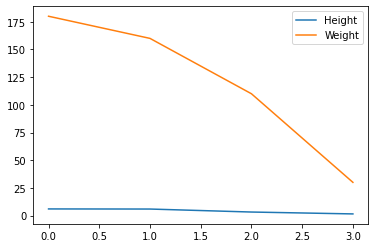

In [162]:
#**********plotting*********
a.plot()

In [168]:
a=pd.DataFrame({'calsgary':[2500,2600,2700,2800,2900,3100,3200,2600,2700,2800,2850,2900,2950,3000],
                'calslauren':[1800,1850,2000,2100,2250,2300,2400,1600,1750,1800,1850,1950,2000,2100],
               'calsjessie':[1100,1050,900,925,950,1000,1175,1300,900,1050,1125,975,1025,885],
                'calsdexter':[400,450,425,460,485,300,510,455,290,440,585,445,485,500]})
a

,calsgary,calslauren,calsjessie,calsdexter
0,2500,1800,1100,400
1,2600,1850,1050,450
2,2700,2000,900,425
3,2800,2100,925,460
4,2900,2250,950,485
5,3100,2300,1000,300
6,3200,2400,1175,510
7,2600,1600,1300,455
8,2700,1750,900,290
9,2800,1800,1050,440


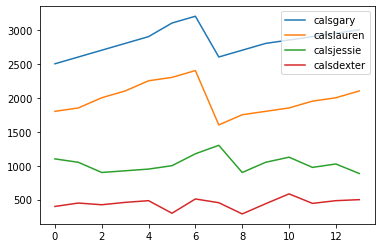

In [169]:
#Basic - This is also kind = 'line'
a.plot()

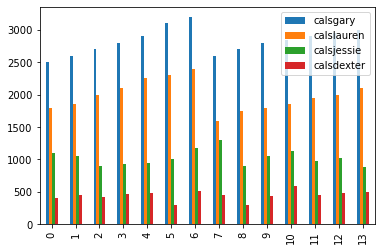

In [172]:
a.plot(kind='bar')

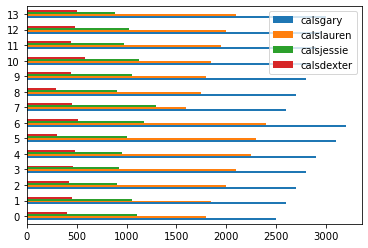

In [173]:
a.plot(kind='barh')

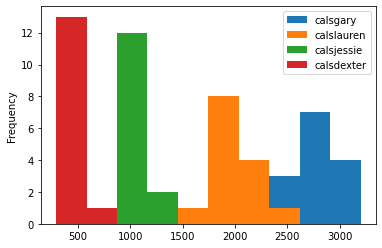

In [174]:
a.plot(kind='hist')

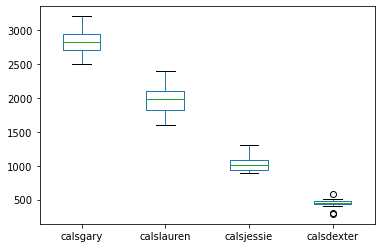

In [175]:
a.plot(kind='box')

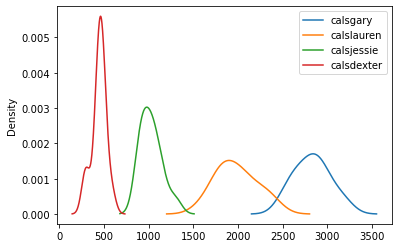

In [177]:
a.plot(kind='kde')

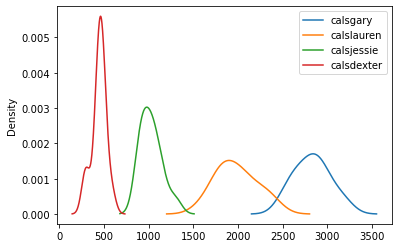

In [178]:
a.plot(kind='density')

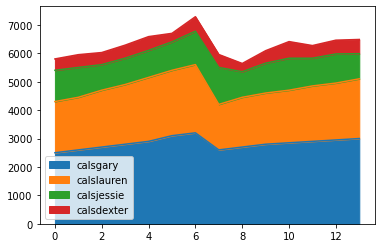

In [179]:
a.plot(kind='area')

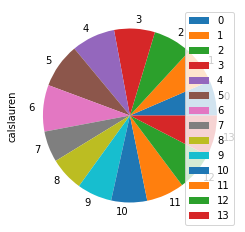

In [185]:
#pie needs a y column
a.plot(kind='pie', y='calslauren')

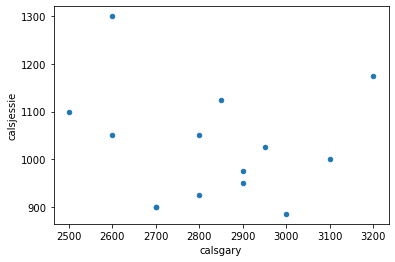

In [188]:
#this requires an x and a y
a.plot(kind='scatter', x='calsgary', y='calsjessie')

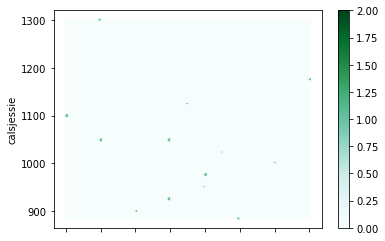

In [194]:
#requires x and y
a.plot(kind='hexbin', x='calsgary', y='calsjessie')

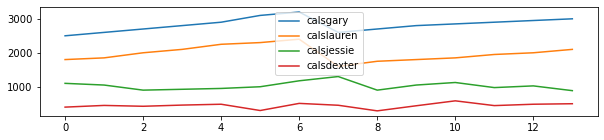

In [200]:
#figsize
a.plot(figsize=(10,2))

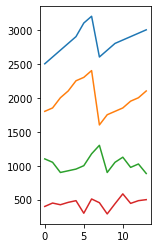

In [203]:
#figsize and no legend
a.plot(figsize=(2,4),legend=False)

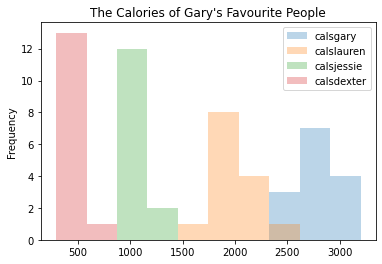

In [212]:
#title and alpha
a.plot(kind='hist',title="The Calories of Gary's Favourite People",alpha=0.3)

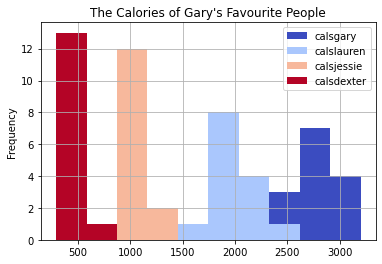

In [215]:
#grid and different colormap
a.plot(kind='hist',title="The Calories of Gary's Favourite People",grid=True,colormap='coolwarm')

In [237]:
###Qbins
a=np.arange(0,11)
pd.qcut(a,q=5)

[(-0.001, 2.0], (-0.001, 2.0], (-0.001, 2.0], (2.0, 4.0], (2.0, 4.0], ..., (4.0, 6.0], (6.0, 8.0], (6.0, 8.0], (8.0, 10.0], (8.0, 10.0]]
Length: 11
Categories (5, interval[float64]): [(-0.001, 2.0] < (2.0, 4.0] < (4.0, 6.0] < (6.0, 8.0] < (8.0, 10.0]]

In [238]:
pd.qcut(a,q=5,labels=['Terrible','Bad','Okay','Good','Excellent'])

[Terrible, Terrible, Terrible, Bad, Bad, ..., Okay, Good, Good, Excellent, Excellent]
Length: 11
Categories (5, object): [Terrible < Bad < Okay < Good < Excellent]

In [241]:
#read clipboard
pd.read_clipboard()

,Hi,my,name,is,gary


In [242]:
#showversions
pd.show_versions()

C:\Users\garyp\anaconda3\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(



INSTALLED VERSIONS
------------------
commit           : None
python           : 3.8.3.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_Ireland.1252

pandas           : 1.0.5
numpy            : 1.18.5
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.1.1
setuptools       : 49.2.0.post20200714
Cython           : 0.29.21
pytest           : 5.4.3
hypothesis       : None
sphinx           : 3.1.2
blosc            : None
feather          : None
xlsxwriter       : 1.2.9
lxml.etree       : 4.5.2
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.8.6 (dt dec pq3 ext lo64)
jinja2           : 2.11.2
IPython          : 7.16.1
pandas_datareader: 0.9.0
bs4              : 4.9.1
bottleneck       : 1.3.2
fastparquet      : None
gcsfs     

In [245]:
from pandas._testing import assert_frame_equal   
from pandas._testing import assert_series_equal
from pandas._testing import assert_index_equal
from pandas._testing import assert_extension_array_equal

In [246]:
df1 = pd.DataFrame({'a': [1, 2], 'b': [3, 4]})
df2 = pd.DataFrame({'a': [1, 2], 'b': [3.0, 4.0]})
df1==df2

,a,b
0,True,True
1,True,True


In [252]:
#no error
assert_frame_equal(df1, df1)

In [253]:
#error
assert_frame_equal(df1, df2)

AssertionError: Attributes of DataFrame.iloc[:, 1] (column name="b") are different

Attribute "dtype" are different
[left]:  int64
[right]: float64

In [260]:
#TimeDelta
pd.Timedelta(hours=1,days=2,seconds=14)

Timedelta('2 days 01:00:14')

In [ ]:
#can use  astring

In [261]:
pd.Timedelta('2 days, 02:00:43')

Timedelta('2 days 02:00:43')

In [8]:
#Timestamp
pd.Timestamp('1991-08-28')

Timestamp('1991-08-28 00:00:00')

In [10]:
pd.Timestamp(1991,8,28)

Timestamp('1991-08-28 00:00:00')

In [12]:
pd.Timestamp('1991-08-28T14:20')

Timestamp('1991-08-28 14:20:00')

In [16]:
#year,month,day,hour,minute,second,
pd.Timestamp(1991,8,28,4,9,4)

Timestamp('1991-08-28 04:09:04')

In [7]:
pd.Timestamp(1513393355.5, unit='s')

Timestamp('2017-12-16 03:02:35.500000')

In [18]:
#todatetime
df=pd.DataFrame({'Year':[1991,1990],'Month':[8,9],'Day':[28,29]})
df

,Year,Month,Day
0,1991,8,28
1,1990,9,29


In [20]:
pd.to_datetime(df)

0   1991-08-28
1   1990-09-29
dtype: datetime64[ns]

In [27]:
#to numeric
df=pd.Series(['4',3,'2'])
df

0    4
1    3
2    2
dtype: object

In [28]:
pd.to_numeric(df)

0    4
1    3
2    2
dtype: int64

In [37]:
s=pd.Series(['5.2','4',2.0])
pd.to_numeric(s,downcast='integer')

0    5.2
1    4.0
2    2.0
dtype: float64

In [38]:
#unique
pd.unique([1,2,3,4,5,4,3,2,4,2])

array([1, 2, 3, 4, 5])

In [41]:
pd.unique(pd.Series(pd.Categorical(list('baabc'))))

[b, a, c]
Categories (3, object): [b, a, c]

In [42]:
pd.unique(pd.Series(list('baabc')))

array(['b', 'a', 'c'], dtype=object)

In [56]:
#value_counts
df=pd.Series([1,2,3,4,5,6,6,1,2,4,5,6,7])

In [57]:
df.value_counts()

6    3
5    2
4    2
2    2
1    2
7    1
3    1
dtype: int64

In [58]:
df.value_counts(normalize=True)

6    0.230769
5    0.153846
4    0.153846
2    0.153846
1    0.153846
7    0.076923
3    0.076923
dtype: float64

In [59]:
#bins only works with numeric data
df.value_counts(bins=3)

(0.993, 3.0]    5
(5.0, 7.0]      4
(3.0, 5.0]      4
dtype: int64

In [65]:
df = pd.DataFrame({'num_legs': [2, 4, 4, 6],
                   'num_wings': [2, 0, 0, 0]},
                  index=['falcon', 'dog', 'cat', 'ant'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0
cat,4,0
ant,6,0


In [69]:
df['num_wings'].value_counts()

0    3
2    1
Name: num_wings, dtype: int64

In [70]:
df.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [71]:
df.count()

num_legs     4
num_wings    4
dtype: int64

In [83]:
#wide to long
df = pd.DataFrame({
    'famid': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'birth': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'ht1': [2.8, 2.9, 2.2, 2, 1.8, 1.9, 2.2, 2.3, 2.1],
    'ht2': [3.4, 3.8, 2.9, 3.2, 2.8, 2.4, 3.3, 3.4, 2.9]})
df

,famid,birth,ht1,ht2
0,1,1,2.8,3.4
1,1,2,2.9,3.8
2,1,3,2.2,2.9
3,2,1,2.0,3.2
4,2,2,1.8,2.8
5,2,3,1.9,2.4
6,3,1,2.2,3.3
7,3,2,2.3,3.4
8,3,3,2.1,2.9


In [85]:
#ht1 and ht2 both fall naturally under 'ht' stubname
#i is the multicolumn index
#j can be called whatever, it lists the observations
pd.wide_to_long(df, stubnames='ht', i=['famid', 'birth'], j='hello')

ht
famid birth hello     
1     1     1      2.8
            2      3.4
      2     1      2.9
            2      3.8
      3     1      2.2
            2      2.9
2     1     1      2.0
            2      3.2
      2     1      1.8
            2      2.8
      3     1      1.9
            2      2.4
3     1     1      2.2
            2      3.3
      2     1      2.3
            2      3.4
      3     1      2.1
            2      2.9

In [86]:
a=pd.DataFrame([np.random(100)])

TypeError: 'module' object is not callable

In [3]:
#Dataframe 'cals', purely numeric
Gary= np.random.randint(-50,50,7)*10 +2500
Lauren= np.random.randint(-45,45,7)*10 +2100
Jessie= np.random.randint(-20,20,7)*10 +1100
Dexter= np.random.randint(-15,15,7)*10 +500
cals=pd.DataFrame({'Gary':Gary,'Lauren':Lauren,'Jessie':Jessie,'Dexter':Dexter})
cals.index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun',]
cals

,Gary,Lauren,Jessie,Dexter
Mon,2590,2040,1270,450
Tue,2200,2220,1170,490
Wed,2640,1750,1170,400
Thu,2990,2390,910,370
Fri,2220,2400,1050,640
Sat,2370,1920,1170,440
Sun,2490,2090,1090,460


In [2]:
#Dataframe 'gary', time series and strings
gary= pd.DataFrame({'Workout':['Chest','Back','Cycle','Shoulder','Rest','Legs','Rest',
                               'Chest','Back','Rest','Back','Chest','Legs','Rest',
                               'Chest','Back','Cycle','Shoulder','Chest','Legs','Rest',
                               'Chest','Back','Cycle','Shoulder','Rest','Legs','Cycle'],
                    'Dinner':['Tofu','Beans','VegMeat','Umi','Tofu','Beans','VegMeat',
                              'Tofu','Beans','VegMeat','Pasta','Tofu','Fiveguys','VegMeat',
                              'Tofu','Beans','VegMeat','Umi','Tofu','Burdocks','VegMeat',
                              'Tofu','Tofu','VegMeat','Tofu','Tofu','Beans','Spicebag']})                                                      
gary.index=pd.date_range('2021-3-1','2021-3-28')
gary

,Workout,Dinner
2021-03-01,Chest,Tofu
2021-03-02,Back,Beans
2021-03-03,Cycle,VegMeat
2021-03-04,Shoulder,Umi
2021-03-05,Rest,Tofu
2021-03-06,Legs,Beans
2021-03-07,Rest,VegMeat
2021-03-08,Chest,Tofu
2021-03-09,Back,Beans
2021-03-10,Rest,VegMeat


In [145]:
cals.add(2)

,Gary,Lauren,Jessie,Dexter
Mon,2702,2242,1112,552
Tue,2072,2212,1182,582
Wed,2622,1902,1172,402
Thu,2342,2342,1092,602
Fri,2622,2472,902,352
Sat,2492,1722,1222,512
Sun,2282,1962,1202,422


In [146]:
cals.add_prefix('cals')

,calsGary,calsLauren,calsJessie,calsDexter
Mon,2700,2240,1110,550
Tue,2070,2210,1180,580
Wed,2620,1900,1170,400
Thu,2340,2340,1090,600
Fri,2620,2470,900,350
Sat,2490,1720,1220,510
Sun,2280,1960,1200,420


In [147]:
cals.add_suffix('cals')

,Garycals,Laurencals,Jessiecals,Dextercals
Mon,2700,2240,1110,550
Tue,2070,2210,1180,580
Wed,2620,1900,1170,400
Thu,2340,2340,1090,600
Fri,2620,2470,900,350
Sat,2490,1720,1220,510
Sun,2280,1960,1200,420


In [151]:
cals.agg('mean',axis=1)

Mon    1650.0
Tue    1510.0
Wed    1522.5
Thu    1592.5
Fri    1585.0
Sat    1485.0
Sun    1465.0
dtype: float64

In [164]:
#mulitple at once
cals.agg(['mean','sum','min','max','size','count','std','var','sem','first','last'])

,Gary,Lauren,Jessie,Dexter
mean,2445.714286,2120.000000,1124.285714,487.142857
sum,17120.000000,14840.000000,7870.000000,3410.000000
min,2070.000000,1720.000000,900.000000,350.000000
max,2700.000000,2470.000000,1220.000000,600.000000
size,7.000000,7.000000,7.000000,7.000000
count,7.000000,7.000000,7.000000,7.000000
std,226.263647,266.895735,109.370493,97.247842
var,51195.238095,71233.333333,11961.904762,9457.142857
sem,85.519620,100.877106,41.338161,36.756230


In [167]:
#different column aggs at once
cals.agg({'Gary': ['min','max'],'Lauren':['sum','mean']})

,Gary,Lauren
max,2700.0,NaN
mean,NaN,2120.0
min,2070.0,NaN
sum,NaN,14840.0


In [171]:
cals.align(gary, join='left')

(     Gary  Lauren  Jessie  Dexter
 Mon  2700    2240    1110     550
 Tue  2070    2210    1180     580
 Wed  2620    1900    1170     400
 Thu  2340    2340    1090     600
 Fri  2620    2470     900     350
 Sat  2490    1720    1220     510
 Sun  2280    1960    1200     420,
      Gary  Lauren  Jessie  Dexter
 Mon   NaN     NaN     NaN     NaN
 Tue   NaN     NaN     NaN     NaN
 Wed   NaN     NaN     NaN     NaN
 Thu   NaN     NaN     NaN     NaN
 Fri   NaN     NaN     NaN     NaN
 Sat   NaN     NaN     NaN     NaN
 Sun   NaN     NaN     NaN     NaN)

In [175]:
x=pd.Series([True,True,False,True])
x.any()

True

In [176]:
x.all()

False

In [178]:
cals.append(gary)

,Gary,Lauren,Jessie,Dexter,Workout,Dinner
Mon,2700.0,2240.0,1110.0,550.0,NaN,NaN
Tue,2070.0,2210.0,1180.0,580.0,NaN,NaN
Wed,2620.0,1900.0,1170.0,400.0,NaN,NaN
Thu,2340.0,2340.0,1090.0,600.0,NaN,NaN
Fri,2620.0,2470.0,900.0,350.0,NaN,NaN
Sat,2490.0,1720.0,1220.0,510.0,NaN,NaN
Sun,2280.0,1960.0,1200.0,420.0,NaN,NaN
2021-03-01 00:00:00,NaN,NaN,NaN,NaN,Chest,Tofu
2021-03-02 00:00:00,NaN,NaN,NaN,NaN,Back,Beans
2021-03-03 00:00:00,NaN,NaN,NaN,NaN,Cycle,VegMeat


In [180]:
cals.apply(np.sqrt)

,Gary,Lauren,Jessie,Dexter
Mon,51.961524,47.328638,33.316662,23.452079
Tue,45.497253,47.010637,34.351128,24.083189
Wed,51.185936,43.588989,34.205263,20.000000
Thu,48.373546,48.373546,33.015148,24.494897
Fri,51.185936,49.699095,30.000000,18.708287
Sat,49.899900,41.472883,34.928498,22.583180
Sun,47.749346,44.271887,34.641016,20.493902


In [182]:
cals.apply(np.max, axis=1)

Mon    2700
Tue    2210
Wed    2620
Thu    2340
Fri    2620
Sat    2490
Sun    2280
dtype: int64

In [185]:
#using lambda, x squared
cals.apply(lambda x:x**2, axis=1)

,Gary,Lauren,Jessie,Dexter
Mon,7290000,5017600,1232100,302500
Tue,4284900,4884100,1392400,336400
Wed,6864400,3610000,1368900,160000
Thu,5475600,5475600,1188100,360000
Fri,6864400,6100900,810000,122500
Sat,6200100,2958400,1488400,260100
Sun,5198400,3841600,1440000,176400


In [187]:
#APPLYMAP
#same for this
cals.applymap(lambda x:x**2)

,Gary,Lauren,Jessie,Dexter
Mon,7290000,5017600,1232100,302500
Tue,4284900,4884100,1392400,336400
Wed,6864400,3610000,1368900,160000
Thu,5475600,5475600,1188100,360000
Fri,6864400,6100900,810000,122500
Sat,6200100,2958400,1488400,260100
Sun,5198400,3841600,1440000,176400


In [190]:
gary.asfreq('30s')

,Workout,Dinner
2021-03-01 00:00:00,Chest,Tofu
2021-03-01 00:00:30,NaN,NaN
2021-03-01 00:01:00,NaN,NaN
2021-03-01 00:01:30,NaN,NaN
2021-03-01 00:02:00,NaN,NaN
...,...,...
2021-03-27 23:58:00,NaN,NaN
2021-03-27 23:58:30,NaN,NaN
2021-03-27 23:59:00,NaN,NaN
2021-03-27 23:59:30,NaN,NaN


In [203]:
#returns the closes to this value which happens at 2021-03-07
cals.assign(GaryoverLauren = Gary-Lauren)
#can also do cals.assign(GaryoverLauren = lambda x: x.Gary-x.Lauren)

,Gary,Lauren,Jessie,Dexter,GaryoverLauren
Mon,2700,2240,1110,550,460
Tue,2070,2210,1180,580,-140
Wed,2620,1900,1170,400,720
Thu,2340,2340,1090,600,0
Fri,2620,2470,900,350,150
Sat,2490,1720,1220,510,770
Sun,2280,1960,1200,420,320


In [205]:
cals.astype(float)

,Gary,Lauren,Jessie,Dexter
Mon,2700.0,2240.0,1110.0,550.0
Tue,2070.0,2210.0,1180.0,580.0
Wed,2620.0,1900.0,1170.0,400.0
Thu,2340.0,2340.0,1090.0,600.0
Fri,2620.0,2470.0,900.0,350.0
Sat,2490.0,1720.0,1220.0,510.0
Sun,2280.0,1960.0,1200.0,420.0


In [206]:
cals.astype(str)

,Gary,Lauren,Jessie,Dexter
Mon,2700,2240,1110,550
Tue,2070,2210,1180,580
Wed,2620,1900,1170,400
Thu,2340,2340,1090,600
Fri,2620,2470,900,350
Sat,2490,1720,1220,510
Sun,2280,1960,1200,420


In [212]:
cals.at['Wed','Gary']

2620

In [219]:
cals.iloc[2].at['Gary']

2620

In [220]:
gary.at_time('12:00:00')

,Workout,Dinner


In [224]:
cals.axes

[Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype='object'),
 Index(['Gary', 'Lauren', 'Jessie', 'Dexter'], dtype='object')]

In [225]:
gary.axes

[DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
                '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
                '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
                '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
                '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
                '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
                '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28'],
               dtype='datetime64[ns]', freq='D'),
 Index(['Workout', 'Dinner'], dtype='object')]

In [239]:
#BETWEEN TIME
a=pd.DataFrame(np.arange(15))
a.index=pd.date_range(start='2000-01-01',end='2000-01-04',freq='5h')
a

,0
2000-01-01 00:00:00,0
2000-01-01 05:00:00,1
2000-01-01 10:00:00,2
2000-01-01 15:00:00,3
2000-01-01 20:00:00,4
2000-01-02 01:00:00,5
2000-01-02 06:00:00,6
2000-01-02 11:00:00,7
2000-01-02 16:00:00,8
2000-01-02 21:00:00,9


In [240]:
a.between_time(start_time = '04:00:00', end_time = '10:00:00')

,0
2000-01-01 05:00:00,1
2000-01-01 10:00:00,2
2000-01-02 06:00:00,6
2000-01-03 07:00:00,11


In [241]:
#not between those times
a.between_time(start_time = '10:00:00', end_time = '4:00:00')

,0
2000-01-01 00:00:00,0
2000-01-01 10:00:00,2
2000-01-01 15:00:00,3
2000-01-01 20:00:00,4
2000-01-02 01:00:00,5
2000-01-02 11:00:00,7
2000-01-02 16:00:00,8
2000-01-02 21:00:00,9
2000-01-03 02:00:00,10
2000-01-03 12:00:00,12


In [245]:
cals.clip(lower=1500,upper=2700)

,Gary,Lauren,Jessie,Dexter
Mon,2700,2240,1500,1500
Tue,2070,2210,1500,1500
Wed,2620,1900,1500,1500
Thu,2340,2340,1500,1500
Fri,2620,2470,1500,1500
Sat,2490,1720,1500,1500
Sun,2280,1960,1500,1500


In [246]:
cals['Lauren'].clip(1600,1900)

Mon    1900
Tue    1900
Wed    1900
Thu    1900
Fri    1900
Sat    1720
Sun    1900
Name: Lauren, dtype: int32

In [251]:
#can do array of clips for elementwise
#each value for monday has to be between 2000 adn 2200. each value for tues btwen 2050 and 2250 etc....
clipslower=np.array([2000,2050,2050,2100,2150,2200,2250])
clipsupper= clipslower+200
cals.clip(clipslower,clipsupper,axis=0)

,Gary,Lauren,Jessie,Dexter
Mon,2200,2200,2000,2000
Tue,2070,2210,2050,2050
Wed,2250,2050,2050,2050
Thu,2300,2300,2100,2100
Fri,2350,2350,2150,2150
Sat,2400,2200,2200,2200
Sun,2280,2250,2250,2250


In [7]:
a=pd.DataFrame({'A':[3,3,3,3],'B':[10,20,30,40]})
b=pd.DataFrame({'A':[2,3,4,5],'B':[27,27,27,27]})

In [8]:
a.combine(b,np.minimum)

,A,B
0,2,10
1,3,20
2,3,27
3,3,27


In [9]:
a.combine(b,lambda s1,s2: s1*s2)

,A,B
0,6,270
1,9,540
2,12,810
3,15,1080


In [35]:
cals.corr()

,Gary,Lauren,Jessie,Dexter
Gary,1.000000,-0.324252,-0.046889,-0.290617
Lauren,-0.324252,1.000000,-0.310533,-0.516401
Jessie,-0.046889,-0.310533,1.000000,0.037194
Dexter,-0.290617,-0.516401,0.037194,1.000000


In [39]:
cals.corrwith(cals['Lauren'])

Gary     -0.324252
Lauren    1.000000
Jessie   -0.310533
Dexter   -0.516401
dtype: float64

In [43]:
cals.corrwith(cals['Lauren'],method='spearman')

Gary     -0.342356
Lauren    1.000000
Jessie   -0.234244
Dexter   -0.162169
dtype: float64

In [47]:
cals.count()

Gary      7
Lauren    7
Jessie    7
Dexter    7
dtype: int64

In [53]:
#or axis =1
cals.count(axis='columns')

Mon    4
Tue    4
Wed    4
Thu    4
Fri    4
Sat    4
Sun    4
dtype: int64

In [60]:
cals.cov()

,Gary,Lauren,Jessie,Dexter
Gary,58157.142857,-7423.809524,-6557.142857,12257.142857
Lauren,-7423.809524,39623.809524,-12542.857143,-2390.476190
Jessie,-6557.142857,-12542.857143,8223.809524,76.190476
Dexter,12257.142857,-2390.476190,76.190476,6190.476190


In [62]:
cals

,Gary,Lauren,Jessie,Dexter
Mon,2840,1970,1230,500
Tue,2700,2430,1100,360
Wed,2980,2500,1030,580
Thu,2840,2230,1130,540
Fri,2660,2500,970,420
Sat,2970,2490,1090,540
Sun,2280,2450,1200,440


In [61]:
cals.cummax()

,Gary,Lauren,Jessie,Dexter
Mon,2840,1970,1230,500
Tue,2840,2430,1230,500
Wed,2980,2500,1230,580
Thu,2980,2500,1230,580
Fri,2980,2500,1230,580
Sat,2980,2500,1230,580
Sun,2980,2500,1230,580


In [63]:
cals.cummin()

,Gary,Lauren,Jessie,Dexter
Mon,2840,1970,1230,500
Tue,2700,1970,1100,360
Wed,2700,1970,1030,360
Thu,2700,1970,1030,360
Fri,2660,1970,970,360
Sat,2660,1970,970,360
Sun,2280,1970,970,360


In [66]:
x=pd.DataFrame([[1,3,5,7],[2,4,6,8],[3,5,6,7]])
x

,0,1,2,3
0,1,3,5,7
1,2,4,6,8
2,3,5,6,7


In [67]:
x.cumprod()

,0,1,2,3
0,1,3,5,7
1,2,12,30,56
2,6,60,180,392


In [68]:
cals.cumsum()

,Gary,Lauren,Jessie,Dexter
Mon,2840,1970,1230,500
Tue,5540,4400,2330,860
Wed,8520,6900,3360,1440
Thu,11360,9130,4490,1980
Fri,14020,11630,5460,2400
Sat,16990,14120,6550,2940
Sun,19270,16570,7750,3380


In [69]:
cals.describe()

,Gary,Lauren,Jessie,Dexter
count,7.000000,7.000000,7.000000,7.000000
mean,2752.857143,2367.142857,1107.142857,482.857143
std,241.157921,199.057302,90.685222,78.679579
min,2280.000000,1970.000000,970.000000,360.000000
25%,2680.000000,2330.000000,1060.000000,430.000000
50%,2840.000000,2450.000000,1100.000000,500.000000
75%,2905.000000,2495.000000,1165.000000,540.000000
max,2980.000000,2500.000000,1230.000000,580.000000


In [73]:
cals.describe(percentiles=[0.1,0.3,0.9])

,Gary,Lauren,Jessie,Dexter
count,7.000000,7.000000,7.000000,7.000000
mean,2752.857143,2367.142857,1107.142857,482.857143
std,241.157921,199.057302,90.685222,78.679579
min,2280.000000,1970.000000,970.000000,360.000000
10%,2508.000000,2126.000000,1006.000000,396.000000
30%,2692.000000,2390.000000,1078.000000,436.000000
50%,2840.000000,2450.000000,1100.000000,500.000000
90%,2974.000000,2500.000000,1212.000000,556.000000
max,2980.000000,2500.000000,1230.000000,580.000000


In [74]:
x=cals.describe()

In [78]:
x.loc['50%']

Gary      2840.0
Lauren    2450.0
Jessie    1100.0
Dexter     500.0
Name: 50%, dtype: float64

In [81]:
cals

,Gary,Lauren,Jessie,Dexter
Mon,2840,1970,1230,500
Tue,2700,2430,1100,360
Wed,2980,2500,1030,580
Thu,2840,2230,1130,540
Fri,2660,2500,970,420
Sat,2970,2490,1090,540
Sun,2280,2450,1200,440


In [82]:
#change in day before
cals.diff()

,Gary,Lauren,Jessie,Dexter
Mon,NaN,NaN,NaN,NaN
Tue,-140.0,460.0,-130.0,-140.0
Wed,280.0,70.0,-70.0,220.0
Thu,-140.0,-270.0,100.0,-40.0
Fri,-180.0,270.0,-160.0,-120.0
Sat,310.0,-10.0,120.0,120.0
Sun,-690.0,-40.0,110.0,-100.0


In [83]:
#change from 3 days before
cals.diff(3)

,Gary,Lauren,Jessie,Dexter
Mon,NaN,NaN,NaN,NaN
Tue,NaN,NaN,NaN,NaN
Wed,NaN,NaN,NaN,NaN
Thu,0.0,260.0,-100.0,40.0
Fri,-40.0,70.0,-130.0,60.0
Sat,-10.0,-10.0,60.0,-40.0
Sun,-560.0,220.0,70.0,-100.0


In [84]:
#change from person on their left
cals.diff(axis=1)

,Gary,Lauren,Jessie,Dexter
Mon,NaN,-870.0,-740.0,-730.0
Tue,NaN,-270.0,-1330.0,-740.0
Wed,NaN,-480.0,-1470.0,-450.0
Thu,NaN,-610.0,-1100.0,-590.0
Fri,NaN,-160.0,-1530.0,-550.0
Sat,NaN,-480.0,-1400.0,-550.0
Sun,NaN,170.0,-1250.0,-760.0


In [86]:
cals.div(2)

,Gary,Lauren,Jessie,Dexter
Mon,1420.0,985.0,615.0,250.0
Tue,1350.0,1215.0,550.0,180.0
Wed,1490.0,1250.0,515.0,290.0
Thu,1420.0,1115.0,565.0,270.0
Fri,1330.0,1250.0,485.0,210.0
Sat,1485.0,1245.0,545.0,270.0
Sun,1140.0,1225.0,600.0,220.0


In [108]:
cals.div(10, fill_value="No Value")

,Gary,Lauren,Jessie,Dexter
Mon,284.0,197.0,123.0,50.0
Tue,270.0,243.0,110.0,36.0
Wed,298.0,250.0,103.0,58.0
Thu,284.0,223.0,113.0,54.0
Fri,266.0,250.0,97.0,42.0
Sat,297.0,249.0,109.0,54.0
Sun,228.0,245.0,120.0,44.0


In [109]:
cals

,Gary,Lauren,Jessie,Dexter
Mon,2840,1970,1230,500
Tue,2700,2430,1100,360
Wed,2980,2500,1030,580
Thu,2840,2230,1130,540
Fri,2660,2500,970,420
Sat,2970,2490,1090,540
Sun,2280,2450,1200,440


In [98]:
#DOT
cals.shape

(7, 4)

In [116]:
series=np.arange(8).reshape(4,2)
series

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [117]:
series.shape

(4, 2)

In [115]:
#[7x4] *[4x2] = [7x2]
cals.dot(series)

,0,1
Mon,11860,18400
Tue,11420,18010
Wed,12600,19690
Thu,12220,18960
Fri,11400,17950
Sat,12580,19670
Sun,12340,18710


In [126]:
#DROP
cals.drop(['Mon','Thu'])

,Gary,Lauren,Jessie,Dexter
Tue,2700,2430,1100,360
Wed,2980,2500,1030,580
Fri,2660,2500,970,420
Sat,2970,2490,1090,540
Sun,2280,2450,1200,440


In [127]:
cals.drop(['Lauren','Jessie'],axis=1)
#or
#cals.drop(columns=['Lauren','Jessie'])

,Gary,Dexter
Mon,2840,500
Tue,2700,360
Wed,2980,580
Thu,2840,540
Fri,2660,420
Sat,2970,540
Sun,2280,440


In [131]:
cals.drop(index=['Mon','Sat'],columns=['Gary','Jessie'], inplace=True)

In [132]:
#permanently changed
cals

,Lauren,Dexter
Tue,2430,360
Wed,2500,580
Thu,2230,540
Fri,2500,420
Sun,2450,440


In [ ]:
#DROP DUPLICATES

In [136]:
cals

,Gary,Lauren,Jessie,Dexter
Mon,2130,1870,990,360
Tue,2530,1800,1010,450
Wed,2690,1650,1180,460
Thu,2200,2090,1290,560
Fri,2090,2170,1160,550
Sat,2570,1820,1140,630
Sun,2610,2340,1290,550


In [143]:
#no complete duplicates
cals.drop_duplicates()

,Gary,Lauren,Jessie,Dexter
Mon,2130,1870,990,360
Tue,2530,1800,1010,450
Wed,2690,1650,1180,460
Thu,2200,2090,1290,560
Fri,2090,2170,1160,550
Sat,2570,1820,1140,630
Sun,2610,2340,1290,550


In [144]:
#note dexter has a 550 duplicate on Fri/Sun
cals.drop_duplicates('Dexter',keep='last')

,Gary,Lauren,Jessie,Dexter
Mon,2130,1870,990,360
Tue,2530,1800,1010,450
Wed,2690,1650,1180,460
Thu,2200,2090,1290,560
Sat,2570,1820,1140,630
Sun,2610,2340,1290,550


In [145]:
cals.drop_duplicates('Dexter',keep=False)

,Gary,Lauren,Jessie,Dexter
Mon,2130,1870,990,360
Tue,2530,1800,1010,450
Wed,2690,1650,1180,460
Thu,2200,2090,1290,560
Sat,2570,1820,1140,630


In [163]:
#droplevel
a=pd.MultiIndex.from_product([['a','b','c'],['Hello','Dog']], names=['letters','word'])
df=pd.DataFrame([[10,20],[15,25],[40,50],[45,55],[60,70],[75,85]], columns=['num1', 'num2'])
df.index=a
df

num1  num2
letters word             
a       Hello    10    20
        Dog      15    25
b       Hello    40    50
        Dog      45    55
c       Hello    60    70
        Dog      75    85

In [167]:
df.droplevel('word')
# or df.droplevel(0)

,num1,num2
letters,,
a,10,20
a,15,25
b,40,50
b,45,55
c,60,70
c,75,85


In [165]:
df.droplevel('letters')
# or df.droplevel(1)

,num1,num2
word,,
Hello,10,20
Dog,15,25
Hello,40,50
Dog,45,55
Hello,60,70
Dog,75,85


In [173]:
df=pd.DataFrame([[10,np.nan],[15,25],[40,pd.NA],[pd.NaT,55],[60,70],[75,85]], columns=['num1', 'num2'])
df

,num1,num2
0,10,NaN
1,15,25
2,40,<NA>
3,NaT,55
4,60,70
5,75,85


In [179]:
df.dropna()
#same result for df.dropna(how='any')

,num1,num2
1,15,25
4,60,70
5,75,85


In [176]:
df.dropna(how='all')

,num1,num2
0,10,NaN
1,15,25
2,40,<NA>
3,NaT,55
4,60,70
5,75,85


In [182]:
cals.dtypes

Gary      int32
Lauren    int32
Jessie    int32
Dexter    int32
dtype: object

In [186]:
x=cals.append(cals)

In [187]:
x.duplicated()

Mon    False
Tue    False
Wed    False
Thu    False
Fri    False
Sat    False
Sun    False
Mon     True
Tue     True
Wed     True
Thu     True
Fri     True
Sat     True
Sun     True
dtype: bool

In [4]:
cals

,Gary,Lauren,Jessie,Dexter
Mon,2720,2020,1110,550
Tue,2950,2500,1050,630
Wed,2430,2170,1240,490
Thu,2590,2530,1210,420
Fri,2480,1890,1190,360
Sat,2860,1670,1090,610
Sun,2970,1910,940,440


In [5]:
gary

,Workout,Dinner
2021-03-01,Chest,Tofu
2021-03-02,Back,Beans
2021-03-03,Cycle,VegMeat
2021-03-04,Shoulder,Umi
2021-03-05,Rest,Tofu
2021-03-06,Legs,Beans
2021-03-07,Rest,VegMeat
2021-03-08,Chest,Tofu
2021-03-09,Back,Beans
2021-03-10,Rest,VegMeat


In [7]:
gary.empty

False

In [21]:
a=pd.DataFrame({'A':[]})
a.empty

True

In [22]:
cals

,Gary,Lauren,Jessie,Dexter
Mon,2720,2020,1110,550
Tue,2950,2500,1050,630
Wed,2430,2170,1240,490
Thu,2590,2530,1210,420
Fri,2480,1890,1190,360
Sat,2860,1670,1090,610
Sun,2970,1910,940,440


In [20]:
#EVAL
cals.eval('GaryvLauren= Gary-Lauren')

,Gary,Lauren,Jessie,Dexter,GaryvLauren
Mon,2720,2020,1110,550,700
Tue,2950,2500,1050,630,450
Wed,2430,2170,1240,490,260
Thu,2590,2530,1210,420,60
Fri,2480,1890,1190,360,590
Sat,2860,1670,1090,610,1190
Sun,2970,1910,940,440,1060


In [26]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df.ewm(com=0.5).mean()

,B
0,0.000000
1,0.750000
2,1.615385
3,1.615385
4,3.670213


In [29]:
a=pd.DataFrame([0,1,2,3,6])
a.expanding(2).sum()

,0
0,NaN
1,1.0
2,3.0
3,6.0
4,12.0


In [30]:
a.expanding(2).mean()

,0
0,NaN
1,0.5
2,1.0
3,1.5
4,2.4


In [31]:
a.expanding(2).min()

,0
0,NaN
1,0.0
2,0.0
3,0.0
4,0.0


In [32]:
a.expanding(2).max()

,0
0,NaN
1,1.0
2,2.0
3,3.0
4,6.0


In [35]:
a=pd.DataFrame({'Gary':[['Hello','Friend','Whats Up'],7,20,[20,25]],'Other': 4})
a

,Gary,Other
0,"[Hello, Friend, Whats Up]",4
1,7,4
2,20,4
3,"[20, 25]",4


In [36]:
a.explode('Gary')

,Gary,Other
0,Hello,4
0,Friend,4
0,Whats Up,4
1,7,4
2,20,4
3,20,4
3,25,4


In [45]:
new=pd.DataFrame({'Gary':[2000,2500,np.nan,3000,pd.NA,3500],
                 'Lauren':[1500,pd.NaT,1600,np.nan,2200,pd.NA]})
new

,Gary,Lauren
0,2000,1500
1,2500,NaT
2,NaN,1600
3,3000,NaN
4,<NA>,2200
5,3500,<NA>


In [46]:
new.fillna('Hello')

,Gary,Lauren
0,2000,1500
1,2500,Hello
2,Hello,1600
3,3000,Hello
4,Hello,2200
5,3500,Hello


In [47]:
new.fillna(method='bfill')

,Gary,Lauren
0,2000,1500
1,2500,1600
2,3000,1600
3,3000,2200
4,3500,2200
5,3500,<NA>


In [48]:
new.fillna(method='ffill')

,Gary,Lauren
0,2000,1500
1,2500,1500
2,2500,1600
3,3000,1600
4,3000,2200
5,3500,2200


In [58]:
#FILTER
new=pd.DataFrame([[20,30,40],[50,60,70],[200,300,400]],index=['Cat','Dog','Mouse']
                , columns=['Red','Blue','Black'])
new

,Red,Blue,Black
Cat,20,30,40
Dog,50,60,70
Mouse,200,300,400


In [59]:
#grab columns red and black
new.filter(items=['Red','Black'])

,Red,Black
Cat,20,40
Dog,50,70
Mouse,200,400


In [60]:
#grab indices cat and mouse
new.filter(items=['Cat','Mouse'],axis=0)

,Red,Blue,Black
Cat,20,30,40
Mouse,200,300,400


In [63]:
#Only cols containing e
new.filter(regex='e')

,Red,Blue
Cat,20,30
Dog,50,60
Mouse,200,300


In [64]:
#Only cols ending in e
new.filter(regex='e$')

,Blue
Cat,30
Dog,60
Mouse,300


In [67]:
#Only rows containing 'ou'
new.filter(like='ou',axis=0)

,Red,Blue,Black
Mouse,200,300,400


In [68]:
gary.head()

,Workout,Dinner
2021-03-01,Chest,Tofu
2021-03-02,Back,Beans
2021-03-03,Cycle,VegMeat
2021-03-04,Shoulder,Umi
2021-03-05,Rest,Tofu


In [70]:
#first 3 days
gary.first('3D')

,Workout,Dinner
2021-03-01,Chest,Tofu
2021-03-02,Back,Beans
2021-03-03,Cycle,VegMeat


In [71]:
#first week
gary.first('1W')

,Workout,Dinner
2021-03-01,Chest,Tofu
2021-03-02,Back,Beans
2021-03-03,Cycle,VegMeat
2021-03-04,Shoulder,Umi
2021-03-05,Rest,Tofu
2021-03-06,Legs,Beans
2021-03-07,Rest,VegMeat


In [86]:
df = pd.DataFrame({'cost': [250, 50, 100],
'revenue': [100, 250, 300]},
index=['A', 'B', 'C'])
df

,cost,revenue
A,250,100
B,50,250
C,100,300


In [87]:
df.eq(100)

,cost,revenue
A,False,True
B,False,False
C,True,False


In [84]:
df.ne(100)

,cost,revenue
A,True,False
B,True,True
C,False,True


In [83]:
df.le(100)

,cost,revenue
A,False,True
B,True,False
C,True,False


In [85]:
df.lt(100)

,cost,revenue
A,False,False
B,True,False
C,False,False


In [82]:
df.ge(100)

,cost,revenue
A,True,True
B,False,True
C,True,True


In [81]:
df.gt(100)

,cost,revenue
A,True,False
B,False,True
C,False,True


In [90]:
#Dataframe 'cals', purely numeric
Gary= np.random.randint(-50,50,8)*10 +2500
Lauren= np.random.randint(-45,45,8)*10 +2100
Jessie= np.random.randint(-20,20,8)*10 +1100
Dexter= np.random.randint(-15,15,8)*10 +500
cals=pd.DataFrame({'Gary':Gary,'Lauren':Lauren,'Jessie':Jessie,'Dexter':Dexter})
cals.index=['Weekday','Weekend','Weekday','Weekend','Weekday','Weekend','Weekday','Weekend']
cals.Multiindex()

,Gary,Lauren,Jessie,Dexter
Weekday,2070,2480,1260,420
Weekend,2460,1820,1220,600
Weekday,2640,1750,1010,550
Weekend,2840,2420,1220,530
Weekday,2660,2410,1020,350
Weekend,2060,2340,1240,440
Weekday,2540,2250,1280,640
Weekend,2570,2450,1270,500


In [92]:
a=[['Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend','Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend'],
  ['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Mon','Tue','Wed','Thu','Fri','Sat','Sun']]

In [138]:
Gary= np.random.randint(-50,50,14)*10 +2500
Lauren= np.random.randint(-45,45,14)*10 +2100
Jessie= np.random.randint(-20,20,14)*10 +1100
Dexter= np.random.randint(-15,15,14)*10 +500
cals=pd.DataFrame({'Gary':Gary,'Lauren':Lauren,'Jessie':Jessie,'Dexter':Dexter})
cals.index=pd.MultiIndex.from_arrays(a,names=['Daytype','Day'])

In [139]:
cals

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Mon  2100    1750    1060     580
        Tue  2240    1760    1180     600
        Wed  2470    2460    1160     630
        Thu  2740    2140    1220     540
        Fri  2110    1730     950     410
Weekend Sat  2790    2510     960     590
        Sun  2640    1660     910     450
Weekday Mon  2560    2100    1060     600
        Tue  2980    1990    1180     580
        Wed  2740    2010    1210     640
        Thu  2750    2240     900     430
        Fri  2670    2270    1060     580
Weekend Sat  2480    2190    1090     460
        Sun  2750    1900    1170     360

In [140]:
#Doing something simple like this just sorts dexters values in ascending order
#note there are some duplicates, EG 3 values at 580, so everyone gets there average here
cals.groupby('Dexter').mean()

,Gary,Lauren,Jessie
Dexter,,,
360,2750.000000,1900.000000,1170.0
410,2110.000000,1730.000000,950.0
430,2750.000000,2240.000000,900.0
450,2640.000000,1660.000000,910.0
460,2480.000000,2190.000000,1090.0
540,2740.000000,2140.000000,1220.0
580,2583.333333,2003.333333,1100.0
590,2790.000000,2510.000000,960.0
600,2400.000000,1930.000000,1120.0


In [143]:
#Laurens values are again sorted. I have duplicates at 2740,2750,
#the other 3 of us have their values summed there
cals.groupby('Gary').sum()

,Lauren,Jessie,Dexter
Gary,,,
2100,1750,1060,580
2110,1730,950,410
2240,1760,1180,600
2470,2460,1160,630
2480,2190,1090,460
2560,2100,1060,600
2640,1660,910,450
2670,2270,1060,580
2740,4150,2430,1180


In [160]:
#Total per day for everyone
cals.groupby('Day').sum()
#can also do cals.groupby(level=1).sum()

,Gary,Lauren,Jessie,Dexter
Day,,,,
Fri,4780,4000,2010,990
Mon,4660,3850,2120,1180
Sat,5270,4700,2050,1050
Sun,5390,3560,2080,810
Thu,5490,4380,2120,970
Tue,5220,3750,2360,1180
Wed,5210,4470,2370,1270


In [164]:
#don't put it as the index
cals.groupby('Day',as_index=False).sum()

,Gary,Lauren,Jessie,Dexter
0,4780,4000,2010,990
1,4660,3850,2120,1180
2,5270,4700,2050,1050
3,5390,3560,2080,810
4,5490,4380,2120,970
5,5220,3750,2360,1180
6,5210,4470,2370,1270


In [167]:
#average weekday vs weekend
cals.groupby('Daytype').mean()
#can also do cals.groupby(level=0).mean()

,Gary,Lauren,Jessie,Dexter
Daytype,,,,
Weekday,2536.0,2045.0,1098.0,559.0
Weekend,2665.0,2065.0,1032.5,465.0


In [157]:
cals.head()

,Gary,Lauren,Jessie,Dexter
Daytype,,,,
Weekday,2536.0,2045.0,1098.0,559.0
Weekend,2665.0,2065.0,1032.5,465.0


In [163]:
cals.groupby('Daytype',sort=False).mean()

,Gary,Lauren,Jessie,Dexter
Daytype,,,,
Weekday,2536.0,2045.0,1098.0,559.0
Weekend,2665.0,2065.0,1032.5,465.0


In [174]:
cals

,Gary,Lauren,Jessie,Dexter
Mon,2710,1910,1100,520
Tue,2910,1910,1240,360
Wed,2250,2090,1000,610
Thu,2290,2330,960,470
Fri,2220,2040,1160,430
Sat,2510,1770,1130,580
Sun,2010,2500,1210,560


In [175]:
#wednesday Lauren
cals.iat[2,1]

2090

In [180]:
#can also use iat as one value when already on a series
cals.iloc[2].iat[1]

2090

In [181]:
cals.idxmax()

Gary      Tue
Lauren    Sun
Jessie    Tue
Dexter    Wed
dtype: object

In [186]:
#return the row where Jessie eats the most
cals.loc[cals.Jessie.idxmax()]

Gary      2910
Lauren    1910
Jessie    1240
Dexter     360
Name: Tue, dtype: int32

In [188]:
#return the day where Gary ate the least
cals.Gary.idxmin()

'Sun'

In [190]:
cals.iloc[1]

Gary      2910
Lauren    1910
Jessie    1240
Dexter     360
Name: Tue, dtype: int32

In [191]:
cals.iloc[[1,4]]

,Gary,Lauren,Jessie,Dexter
Tue,2910,1910,1240,360
Fri,2220,2040,1160,430


In [193]:
cals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Mon to Sun
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gary    7 non-null      int32
 1   Lauren  7 non-null      int32
 2   Jessie  7 non-null      int32
 3   Dexter  7 non-null      int32
dtypes: int32(4)
memory usage: 488.0+ bytes


In [194]:
cals.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Mon to Sun
Columns: 4 entries, Gary to Dexter
dtypes: int32(4)
memory usage: 488.0+ bytes


In [ ]:
#INSERT

In [202]:
cals.insert(1,'hello',4)
cals

,Gary,hello,Lauren,Jessie,Dexter
Mon,2710,4,1910,1100,520
Tue,2910,4,1910,1240,360
Wed,2250,4,2090,1000,610
Thu,2290,4,2330,960,470
Fri,2220,4,2040,1160,430
Sat,2510,4,1770,1130,580
Sun,2010,4,2500,1210,560


In [ ]:
cals.drop('hello',axis=1)

In [218]:
cals.insert(4,'Gary_Surplus_Over_Dexter',cals.Gary - cals.Dexter)

In [219]:
cals

,Gary,Lauren,Jessie,Dexter,Gary_Surplus_Over_Dexter
Mon,2710,1910,1100,520,2190
Tue,2910,1910,1240,360,2550
Wed,2250,2090,1000,610,1640
Thu,2290,2330,960,470,1820
Fri,2220,2040,1160,430,1790
Sat,2510,1770,1130,580,1930
Sun,2010,2500,1210,560,1450


In [255]:
cals.drop('Newrow',axis=1,inplace=True)

In [237]:
cals.insert(3,'Newrow',[100,200,np.nan,np.nan,np.nan, np.nan, 300])

In [238]:
cals

,Gary,Lauren,Jessie,Newrow,Dexter
Mon,2710,1910,1100,100.0,520
Tue,2910,1910,1240,200.0,360
Wed,2250,2090,1000,NaN,610
Thu,2290,2330,960,NaN,470
Fri,2220,2040,1160,NaN,430
Sat,2510,1770,1130,NaN,580
Sun,2010,2500,1210,300.0,560


In [239]:
#linear interpolation between 200 and 300
cals.interpolate()

,Gary,Lauren,Jessie,Newrow,Dexter
Mon,2710,1910,1100,100.0,520
Tue,2910,1910,1240,200.0,360
Wed,2250,2090,1000,220.0,610
Thu,2290,2330,960,240.0,470
Fri,2220,2040,1160,260.0,430
Sat,2510,1770,1130,280.0,580
Sun,2010,2500,1210,300.0,560


In [240]:
#linear intepolation between Jessie and Dexter
cals.interpolate(axis=1)

,Gary,Lauren,Jessie,Newrow,Dexter
Mon,2710.0,1910.0,1100.0,100.0,520.0
Tue,2910.0,1910.0,1240.0,200.0,360.0
Wed,2250.0,2090.0,1000.0,805.0,610.0
Thu,2290.0,2330.0,960.0,715.0,470.0
Fri,2220.0,2040.0,1160.0,795.0,430.0
Sat,2510.0,1770.0,1130.0,855.0,580.0
Sun,2010.0,2500.0,1210.0,300.0,560.0


In [256]:
cals.isin(range(1000,2500))

,Gary,Lauren,Jessie,Dexter
Mon,False,True,True,False
Tue,False,True,True,False
Wed,True,True,True,False
Thu,True,True,False,False
Fri,True,True,True,False
Sat,False,True,True,False
Sun,True,False,True,False


In [258]:
cals.items()

<generator object DataFrame.items at 0x000001AAF090ADD0>

In [260]:
for i in cals.items():
    print (i)

('Gary', Mon    2710
Tue    2910
Wed    2250
Thu    2290
Fri    2220
Sat    2510
Sun    2010
Name: Gary, dtype: int32)
('Lauren', Mon    1910
Tue    1910
Wed    2090
Thu    2330
Fri    2040
Sat    1770
Sun    2500
Name: Lauren, dtype: int32)
('Jessie', Mon    1100
Tue    1240
Wed    1000
Thu     960
Fri    1160
Sat    1130
Sun    1210
Name: Jessie, dtype: int32)
('Dexter', Mon    520
Tue    360
Wed    610
Thu    470
Fri    430
Sat    580
Sun    560
Name: Dexter, dtype: int32)


In [263]:
for i in cals.iterrows():
    print (i)

('Mon', Gary      2710
Lauren    1910
Jessie    1100
Dexter     520
Name: Mon, dtype: int32)
('Tue', Gary      2910
Lauren    1910
Jessie    1240
Dexter     360
Name: Tue, dtype: int32)
('Wed', Gary      2250
Lauren    2090
Jessie    1000
Dexter     610
Name: Wed, dtype: int32)
('Thu', Gary      2290
Lauren    2330
Jessie     960
Dexter     470
Name: Thu, dtype: int32)
('Fri', Gary      2220
Lauren    2040
Jessie    1160
Dexter     430
Name: Fri, dtype: int32)
('Sat', Gary      2510
Lauren    1770
Jessie    1130
Dexter     580
Name: Sat, dtype: int32)
('Sun', Gary      2010
Lauren    2500
Jessie    1210
Dexter     560
Name: Sun, dtype: int32)


In [264]:
for i in cals.itertuples():
    print (i)

Pandas(Index='Mon', Gary=2710, Lauren=1910, Jessie=1100, Dexter=520)
Pandas(Index='Tue', Gary=2910, Lauren=1910, Jessie=1240, Dexter=360)
Pandas(Index='Wed', Gary=2250, Lauren=2090, Jessie=1000, Dexter=610)
Pandas(Index='Thu', Gary=2290, Lauren=2330, Jessie=960, Dexter=470)
Pandas(Index='Fri', Gary=2220, Lauren=2040, Jessie=1160, Dexter=430)
Pandas(Index='Sat', Gary=2510, Lauren=1770, Jessie=1130, Dexter=580)
Pandas(Index='Sun', Gary=2010, Lauren=2500, Jessie=1210, Dexter=560)


In [268]:
gary.last('4D')

,Workout,Dinner
2021-03-25,Shoulder,Tofu
2021-03-26,Rest,Tofu
2021-03-27,Legs,Beans
2021-03-28,Cycle,Spicebag


In [275]:
cals.loc['Tue']

Gary      2910
Lauren    1910
Jessie    1240
Dexter     360
Name: Tue, dtype: int32

In [284]:
df = pd.DataFrame([['1990', 'a', 5, 4, 7, 2], ['1991', 'c', 10, 1, 2, 0], ['1992', 'd', 2, 1, 4, 12], ['1993', 'a', 5, 8, 11, 6]], columns=('Date', 'best', 'a', 'b', 'c', 'd'))
df

,Date,best,a,b,c,d
0,1990,a,5,4,7,2
1,1991,c,10,1,2,0
2,1992,d,2,1,4,12
3,1993,a,5,8,11,6


In [285]:
df['new']=df.lookup(df.index,df.best)

In [287]:
#so what this does is looks down at col best (EG value a, and finds itself in the same row/col, i.e 5
#next it finds c,c  at 0, d,d at 12, and a a again at 5
df

,Date,best,a,b,c,d,new
0,1990,a,5,4,7,2,5
1,1991,c,10,1,2,0,2
2,1992,d,2,1,4,12,12
3,1993,a,5,8,11,6,5


In [293]:
#MAD
x=pd.DataFrame([[1,2,3],[10,20,30],[100,200,300]])
x

,0,1,2
0,1,2,3
1,10,20,30
2,100,200,300


In [294]:
#mean for first col is 1+10+100 / 3 = 37
#mean absolute deviation is  (|1-37| +|10-37| +|100-37| ) /3
x.mad()

0     42.0
1     84.0
2    126.0
dtype: float64

In [295]:
#put Nans where condition is true
cals.mask(cals>2000)

,Gary,Lauren,Jessie,Dexter
Mon,NaN,1910.0,1100,520
Tue,NaN,1910.0,1240,360
Wed,NaN,NaN,1000,610
Thu,NaN,NaN,960,470
Fri,NaN,NaN,1160,430
Sat,NaN,1770.0,1130,580
Sun,NaN,NaN,1210,560


In [297]:
cals.mask(cals<=925, other="LOL")

,Gary,Lauren,Jessie,Dexter
Mon,2710,1910,1100,LOL
Tue,2910,1910,1240,LOL
Wed,2250,2090,1000,LOL
Thu,2290,2330,960,LOL
Fri,2220,2040,1160,LOL
Sat,2510,1770,1130,LOL
Sun,2010,2500,1210,LOL


In [298]:
cals.max()

Gary      2910
Lauren    2500
Jessie    1240
Dexter     610
dtype: int32

In [299]:
cals.mean()

Gary      2414.285714
Lauren    2078.571429
Jessie    1114.285714
Dexter     504.285714
dtype: float64

In [300]:
cals.Dexter.min()

360

In [301]:
cals.median()

Gary      16900
Lauren    14550
Jessie     7800
Dexter     3530
dtype: int64

In [311]:
a=pd.Series([1,2,3,4,5,5,5,6,7,7,8,8,9,9,10,11,12,13])
a.median()

7.0

In [313]:
cals.memory_usage()

Index     376
Gary       28
Lauren     28
Jessie     28
Dexter     28
dtype: int64

In [ ]:
cals.mul()

In [314]:
cals.multiply(3)

,Gary,Lauren,Jessie,Dexter
Mon,8130,5730,3300,1560
Tue,8730,5730,3720,1080
Wed,6750,6270,3000,1830
Thu,6870,6990,2880,1410
Fri,6660,6120,3480,1290
Sat,7530,5310,3390,1740
Sun,6030,7500,3630,1680


In [322]:
cals

,Gary,Lauren,Jessie,Dexter
Mon,2710,1910,1100,520
Tue,2910,1910,1240,360
Wed,2250,2090,1000,610
Thu,2290,2330,960,470
Fri,2220,2040,1160,430
Sat,2510,1770,1130,580
Sun,2010,2500,1210,560


In [321]:
cals.nlargest(4,'Gary')

,Gary,Lauren,Jessie,Dexter
Tue,2910,1910,1240,360
Mon,2710,1910,1100,520
Sat,2510,1770,1130,580
Thu,2290,2330,960,470


In [323]:
cals.nsmallest(4,'Lauren')

,Gary,Lauren,Jessie,Dexter
Sat,2510,1770,1130,580
Mon,2710,1910,1100,520
Tue,2910,1910,1240,360
Fri,2220,2040,1160,430


In [325]:
#lauren has a duplicate at 1910, last prioritises the latter
cals.nunique()

Gary      7
Lauren    6
Jessie    7
Dexter    7
dtype: int64

In [328]:
cals.pct_change(axis=0)

,Gary,Lauren,Jessie,Dexter
Mon,NaN,NaN,NaN,NaN
Tue,0.073801,0.000000,0.127273,-0.307692
Wed,-0.226804,0.094241,-0.193548,0.694444
Thu,0.017778,0.114833,-0.040000,-0.229508
Fri,-0.030568,-0.124464,0.208333,-0.085106
Sat,0.130631,-0.132353,-0.025862,0.348837
Sun,-0.199203,0.412429,0.070796,-0.034483


In [329]:
#Jessie as a change from Gary, Dexdter as a change from Lauren
cals.pct_change(2,axis=1,)

,Gary,Lauren,Jessie,Dexter
Mon,NaN,NaN,-0.594096,-0.727749
Tue,NaN,NaN,-0.573883,-0.811518
Wed,NaN,NaN,-0.555556,-0.708134
Thu,NaN,NaN,-0.580786,-0.798283
Fri,NaN,NaN,-0.477477,-0.789216
Sat,NaN,NaN,-0.549801,-0.672316
Sun,NaN,NaN,-0.398010,-0.776000


In [332]:
def f(x):
    return x*2
def g(x):
    return x*3
def h(x):
    return x*4

In [339]:
df=pd.DataFrame([[1,1],[1,2]])
f(g(h(df)))

,0,1
0,24,24
1,24,48


In [340]:
df.pipe(h).pipe(g).pipe(f)

,0,1
0,24,24
1,24,48


In [341]:
cals.pop('Lauren')

Mon    1910
Tue    1910
Wed    2090
Thu    2330
Fri    2040
Sat    1770
Sun    2500
Name: Lauren, dtype: int32

In [343]:
cals.insert(1,'Lauren',[1910,1910,2090,2330,2040,1770,2500])

In [351]:
#Jessie and dexters calories multiplied each day
cals[['Jessie','Dexter']].prod(axis=1)

Mon    572000
Tue    446400
Wed    610000
Thu    451200
Fri    498800
Sat    655400
Sun    677600
dtype: int32

In [372]:
cals

,Gary,Lauren,Jessie,Dexter
Mon,2710,1910,1100,520
Tue,2910,1910,1240,360
Wed,2250,2090,1000,610
Thu,2290,2330,960,470
Fri,2220,2040,1160,430
Sat,2510,1770,1130,580
Sun,2010,2500,1210,560


In [361]:
#using interpolation to get the 10%ile, between 1770 and 1910
cals.Lauren.quantile(0.1)

1854.0

In [362]:
#just the nearest
cals.Lauren.quantile(0.1, 'nearest')

1910

In [371]:
#95%ile using lower will just get the 2nd biggest value
cals.quantile(0.95, interpolation ='lower')

Gary      2710
Lauren    2330
Jessie    1210
Dexter     580
Name: 0.95, dtype: int64

In [373]:
#by day
cals.quantile(0.7, axis=1)

Mon    1990.0
Tue    2010.0
Wed    2106.0
Thu    2294.0
Fri    2058.0
Sat    1844.0
Sun    2059.0
Name: 0.7, dtype: float64

In [377]:
#QUERY
cals.query('Gary>Lauren')
# Same as cals[cals.Gary>cals.Lauren]

,Gary,Lauren,Jessie,Dexter
Mon,2710,1910,1100,520
Tue,2910,1910,1240,360
Wed,2250,2090,1000,610
Fri,2220,2040,1160,430
Sat,2510,1770,1130,580


In [378]:
cals.query('Gary<Lauren')
# Same as cals[cals.Gary<cals.Lauren]

,Gary,Lauren,Jessie,Dexter
Thu,2290,2330,960,470
Sun,2010,2500,1210,560


In [382]:
cals.insert(4,'New',[1000,1100,1200,None, None,1300,1400])

In [383]:
cals

,Gary,Lauren,Jessie,Dexter,New
Mon,2710,1910,1100,520,1000.0
Tue,2910,1910,1240,360,1100.0
Wed,2250,2090,1000,610,1200.0
Thu,2290,2330,960,470,NaN
Fri,2220,2040,1160,430,NaN
Sat,2510,1770,1130,580,1300.0
Sun,2010,2500,1210,560,1400.0


In [384]:
cals.rank()

,Gary,Lauren,Jessie,Dexter,New
Mon,6.0,2.5,3.0,4.0,1.0
Tue,7.0,2.5,7.0,1.0,2.0
Wed,3.0,5.0,2.0,7.0,3.0
Thu,4.0,6.0,1.0,3.0,NaN
Fri,2.0,4.0,5.0,2.0,NaN
Sat,5.0,1.0,4.0,6.0,4.0
Sun,1.0,7.0,6.0,5.0,5.0


In [389]:
cals.rank(axis=1)

,Gary,Lauren,Jessie,Dexter,New
Mon,5.0,4.0,3.0,1.0,2.0
Tue,5.0,4.0,3.0,1.0,2.0
Wed,5.0,4.0,2.0,1.0,3.0
Thu,3.0,4.0,2.0,1.0,NaN
Fri,4.0,3.0,2.0,1.0,NaN
Sat,5.0,4.0,2.0,1.0,3.0
Sun,4.0,5.0,2.0,1.0,3.0


In [391]:
#this puts "new" as the new lowest rank where Nan
cals.rank(axis=1,na_option='top')

,Gary,Lauren,Jessie,Dexter,New
Mon,5.0,4.0,3.0,1.0,2.0
Tue,5.0,4.0,3.0,1.0,2.0
Wed,5.0,4.0,2.0,1.0,3.0
Thu,4.0,5.0,3.0,2.0,1.0
Fri,5.0,4.0,3.0,2.0,1.0
Sat,5.0,4.0,2.0,1.0,3.0
Sun,4.0,5.0,2.0,1.0,3.0


In [401]:
#it remembers the values from previous index and keeps them if they match
a=['Tue','Hello','Doggy','Fuck','Sat','Meow','Silly']
cals.reindex(a)

,Gary,Lauren,Jessie,Dexter,New
Tue,2910.0,1910.0,1240.0,360.0,1100.0
Hello,NaN,NaN,NaN,NaN,NaN
Doggy,NaN,NaN,NaN,NaN,NaN
Fuck,NaN,NaN,NaN,NaN,NaN
Sat,2510.0,1770.0,1130.0,580.0,1300.0
Meow,NaN,NaN,NaN,NaN,NaN
Silly,NaN,NaN,NaN,NaN,NaN


In [410]:
cals.drop('New',axis=1, inplace=True)

In [411]:
cals.rename(columns={'Gary':'Laurensbf','Jessie':'Garys Dog'})

,Laurensbf,Lauren,Garys Dog,Dexter
Mon,2710,1910,1100,520
Tue,2910,1910,1240,360
Wed,2250,2090,1000,610
Thu,2290,2330,960,470
Fri,2220,2040,1160,430
Sat,2510,1770,1130,580
Sun,2010,2500,1210,560


In [412]:
cals.rename(columns={'Gary':'Laurensbf','Jessie':'Garys Dog'},index={'Fri':'Friday','Sun':'Gods Day'})

,Laurensbf,Lauren,Garys Dog,Dexter
Mon,2710,1910,1100,520
Tue,2910,1910,1240,360
Wed,2250,2090,1000,610
Thu,2290,2330,960,470
Friday,2220,2040,1160,430
Sat,2510,1770,1130,580
Gods Day,2010,2500,1210,560


In [194]:
a=[['Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend','Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend'],
  ['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
Gary= np.random.randint(-50,50,14)*10 +2500
Lauren= np.random.randint(-45,45,14)*10 +2100
Jessie= np.random.randint(-20,20,14)*10 +1100
Dexter= np.random.randint(-15,15,14)*10 +500
cals=pd.DataFrame({'Gary':Gary,'Lauren':Lauren,'Jessie':Jessie,'Dexter':Dexter})
cals.index=pd.MultiIndex.from_arrays(a,names=['Daytype','Day'])
cals

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Mon  2050    2100     980     640
        Tue  2830    1790    1200     400
        Wed  2550    2160     920     610
        Thu  2070    2490    1230     390
        Fri  2100    2240    1220     460
Weekend Sat  2880    2460    1090     540
        Sun  2560    2420     990     380
Weekday Mon  2840    1800    1040     370
        Tue  2170    2430    1000     420
        Wed  2690    2490    1130     540
        Thu  2300    2250    1190     500
        Fri  2320    2490     940     640
Weekend Sat  2270    1860    1050     440
        Sun  2920    2300     930     520

In [8]:
cals.reorder_levels(['Day','Daytype'])

,,Gary,Lauren,Jessie,Dexter
Day,Daytype,,,,
Mon,Weekday,2130,2250,1080,590
Tue,Weekday,2970,1890,1000,620
Wed,Weekday,2570,2090,1200,610
Thu,Weekday,2750,2530,1010,420
Fri,Weekday,2710,1920,980,370
Sat,Weekend,2390,2370,910,560
Sun,Weekend,2920,2320,970,520
Mon,Weekday,2340,1990,1210,370
Tue,Weekday,2510,2100,1130,370


In [10]:
cals.swaplevel()

,,Gary,Lauren,Jessie,Dexter
Day,Daytype,,,,
Mon,Weekday,2130,2250,1080,590
Tue,Weekday,2970,1890,1000,620
Wed,Weekday,2570,2090,1200,610
Thu,Weekday,2750,2530,1010,420
Fri,Weekday,2710,1920,980,370
Sat,Weekend,2390,2370,910,560
Sun,Weekend,2920,2320,970,520
Mon,Weekday,2340,1990,1210,370
Tue,Weekday,2510,2100,1130,370


In [12]:
cals.replace(370,'Dexter you ate too little!')

Gary  Lauren  Jessie                      Dexter
Daytype Day                                                  
Weekday Mon  2130    2250    1080                         590
        Tue  2970    1890    1000                         620
        Wed  2570    2090    1200                         610
        Thu  2750    2530    1010                         420
        Fri  2710    1920     980  Dexter you ate too little!
Weekend Sat  2390    2370     910                         560
        Sun  2920    2320     970                         520
Weekday Mon  2340    1990    1210  Dexter you ate too little!
        Tue  2510    2100    1130  Dexter you ate too little!
        Wed  2020    2370    1100                         550
        Thu  2730    2040    1250                         480
        Fri  2740    2350    1200                         630
Weekend Sat  2550    2380    1190                         430
        Sun  2620    2500    1290                         640

In [13]:
gary

,Workout,Dinner
2021-03-01,Chest,Tofu
2021-03-02,Back,Beans
2021-03-03,Cycle,VegMeat
2021-03-04,Shoulder,Umi
2021-03-05,Rest,Tofu
2021-03-06,Legs,Beans
2021-03-07,Rest,VegMeat
2021-03-08,Chest,Tofu
2021-03-09,Back,Beans
2021-03-10,Rest,VegMeat


In [21]:
#resample my data into 3H intervals
gary.resample('3H').asfreq()

,Workout,Dinner
2021-03-01 00:00:00,Chest,Tofu
2021-03-01 03:00:00,NaN,NaN
2021-03-01 06:00:00,NaN,NaN
2021-03-01 09:00:00,NaN,NaN
2021-03-01 12:00:00,NaN,NaN
...,...,...
2021-03-27 12:00:00,NaN,NaN
2021-03-27 15:00:00,NaN,NaN
2021-03-27 18:00:00,NaN,NaN
2021-03-27 21:00:00,NaN,NaN


In [22]:
#adds standard index
gary.reset_index()

,index,Workout,Dinner
0,2021-03-01,Chest,Tofu
1,2021-03-02,Back,Beans
2,2021-03-03,Cycle,VegMeat
3,2021-03-04,Shoulder,Umi
4,2021-03-05,Rest,Tofu
5,2021-03-06,Legs,Beans
6,2021-03-07,Rest,VegMeat
7,2021-03-08,Chest,Tofu
8,2021-03-09,Back,Beans
9,2021-03-10,Rest,VegMeat


In [24]:
cals

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Mon  2130    2250    1080     590
        Tue  2970    1890    1000     620
        Wed  2570    2090    1200     610
        Thu  2750    2530    1010     420
        Fri  2710    1920     980     370
Weekend Sat  2390    2370     910     560
        Sun  2920    2320     970     520
Weekday Mon  2340    1990    1210     370
        Tue  2510    2100    1130     370
        Wed  2020    2370    1100     550
        Thu  2730    2040    1250     480
        Fri  2740    2350    1200     630
Weekend Sat  2550    2380    1190     430
        Sun  2620    2500    1290     640

In [26]:
#this takes daytype out of index
cals.reset_index(level='Daytype')

,Daytype,Gary,Lauren,Jessie,Dexter
Day,,,,,
Mon,Weekday,2130,2250,1080,590
Tue,Weekday,2970,1890,1000,620
Wed,Weekday,2570,2090,1200,610
Thu,Weekday,2750,2530,1010,420
Fri,Weekday,2710,1920,980,370
Sat,Weekend,2390,2370,910,560
Sun,Weekend,2920,2320,970,520
Mon,Weekday,2340,1990,1210,370
Tue,Weekday,2510,2100,1130,370


In [49]:
a=pd.DataFrame([[1,2],[3,4],[5,6],[7,8],[9,10]])
a

,0,1
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10


In [39]:
#sum of 2 values in a row
a.rolling(2).sum()

,0,1
0,NaN,NaN
1,4.0,6.0
2,8.0,10.0
3,12.0,14.0
4,16.0,18.0


In [40]:
#3 value rolling avearge
a.rolling(3).mean()

,0,1
0,NaN,NaN
1,NaN,NaN
2,3.0,4.0
3,5.0,6.0
4,7.0,8.0


In [41]:
a.rolling(3,win_type='triang').mean()

,0,1
0,NaN,NaN
1,NaN,NaN
2,3.0,4.0
3,5.0,6.0
4,7.0,8.0


In [43]:
#gaussian requires std
a.rolling(3,min_periods=2,win_type='gaussian').sum(std=3)

,0,1
0,NaN,NaN
1,3.837878,5.783838
2,8.675757,11.567676
3,14.459595,17.351514
4,20.243433,23.135352


In [57]:
df=pd.DataFrame([10,20,30,40,50])
df.index=pd.date_range('2021-01-01','2021-01-02',freq='6h')

In [58]:
df

,0
2021-01-01 00:00:00,10
2021-01-01 06:00:00,20
2021-01-01 12:00:00,30
2021-01-01 18:00:00,40
2021-01-02 00:00:00,50


In [60]:
#12hr rolling gives a 2 period rolling for this time series
df.rolling('12h').mean()

,0
2021-01-01 00:00:00,10.0
2021-01-01 06:00:00,15.0
2021-01-01 12:00:00,25.0
2021-01-01 18:00:00,35.0
2021-01-02 00:00:00,45.0


In [64]:
x=cals.div(4.1)

In [65]:
x

Gary      Lauren      Jessie      Dexter
Daytype Day                                                
Weekday Mon  519.512195  548.780488  263.414634  143.902439
        Tue  724.390244  460.975610  243.902439  151.219512
        Wed  626.829268  509.756098  292.682927  148.780488
        Thu  670.731707  617.073171  246.341463  102.439024
        Fri  660.975610  468.292683  239.024390   90.243902
Weekend Sat  582.926829  578.048780  221.951220  136.585366
        Sun  712.195122  565.853659  236.585366  126.829268
Weekday Mon  570.731707  485.365854  295.121951   90.243902
        Tue  612.195122  512.195122  275.609756   90.243902
        Wed  492.682927  578.048780  268.292683  134.146341
        Thu  665.853659  497.560976  304.878049  117.073171
        Fri  668.292683  573.170732  292.682927  153.658537
Weekend Sat  621.951220  580.487805  290.243902  104.878049
        Sun  639.024390  609.756098  314.634146  156.097561

In [67]:
x.round(2)

Gary  Lauren  Jessie  Dexter
Daytype Day                                
Weekday Mon  519.51  548.78  263.41  143.90
        Tue  724.39  460.98  243.90  151.22
        Wed  626.83  509.76  292.68  148.78
        Thu  670.73  617.07  246.34  102.44
        Fri  660.98  468.29  239.02   90.24
Weekend Sat  582.93  578.05  221.95  136.59
        Sun  712.20  565.85  236.59  126.83
Weekday Mon  570.73  485.37  295.12   90.24
        Tue  612.20  512.20  275.61   90.24
        Wed  492.68  578.05  268.29  134.15
        Thu  665.85  497.56  304.88  117.07
        Fri  668.29  573.17  292.68  153.66
Weekend Sat  621.95  580.49  290.24  104.88
        Sun  639.02  609.76  314.63  156.10

In [68]:
#1 random sample
cals.sample()

,,Gary,Lauren,Jessie,Dexter
Daytype,Day,,,,
Weekday,Fri,2710,1920,980,370


In [71]:
#5 sample, state assures same values each time
cals.sample(5, random_state=4)

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Fri  2710    1920     980     370
        Thu  2750    2530    1010     420
        Fri  2740    2350    1200     630
        Wed  2020    2370    1100     550
Weekend Sun  2920    2320     970     520

In [74]:
#Instead of number of samples, percentage of total
#replace allows duplicates
cals.sample(frac=0.6, replace=True)

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Mon  2130    2250    1080     590
Weekend Sun  2620    2500    1290     640
Weekday Thu  2730    2040    1250     480
        Tue  2510    2100    1130     370
        Tue  2510    2100    1130     370
        Tue  2510    2100    1130     370
        Thu  2730    2040    1250     480
        Thu  2730    2040    1250     480

In [78]:
#can sample > 100% but would need replace = True
cals.sample(frac=1.2,replace=True)

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Mon  2340    1990    1210     370
        Mon  2340    1990    1210     370
        Wed  2570    2090    1200     610
Weekend Sat  2550    2380    1190     430
Weekday Thu  2730    2040    1250     480
        Wed  2570    2090    1200     610
        Tue  2970    1890    1000     620
Weekend Sun  2620    2500    1290     640
        Sat  2550    2380    1190     430
Weekday Tue  2510    2100    1130     370
        Thu  2730    2040    1250     480
Weekend Sat  2390    2370     910     560
Weekday Thu  2730    2040    1250     480
        Fri  2740    2350    1200     630
        Mon  2130    2250    1080     590
Weekend Sun  2920    2320     970     520
Weekday Tue  2510    2100    1130     370

In [82]:
#more likely to get higher Dexter values
cals.sample(3, weights='Dexter')

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Tue  2970    1890    1000     620
        Wed  2570    2090    1200     610
Weekend Sun  2620    2500    1290     640

In [87]:
cals.sem()

Gary      73.261376
Lauren    56.857806
Jessie    31.845388
Dexter    27.553288
dtype: float64

In [85]:
cals.std()

Gary      274.118968
Lauren    212.742428
Jessie    119.154531
Dexter    103.094963
dtype: float64

In [91]:
cals.set_axis(['Hi','Hello','Dog','Cat'], axis=1)

Hi  Hello   Dog  Cat
Daytype Day                        
Weekday Mon  2130   2250  1080  590
        Tue  2970   1890  1000  620
        Wed  2570   2090  1200  610
        Thu  2750   2530  1010  420
        Fri  2710   1920   980  370
Weekend Sat  2390   2370   910  560
        Sun  2920   2320   970  520
Weekday Mon  2340   1990  1210  370
        Tue  2510   2100  1130  370
        Wed  2020   2370  1100  550
        Thu  2730   2040  1250  480
        Fri  2740   2350  1200  630
Weekend Sat  2550   2380  1190  430
        Sun  2620   2500  1290  640

In [93]:
#this makes Gary the index but also keeps Gary
cals.set_index('Gary',drop=False)

,Gary,Lauren,Jessie,Dexter
Gary,,,,
2130,2130,2250,1080,590
2970,2970,1890,1000,620
2570,2570,2090,1200,610
2750,2750,2530,1010,420
2710,2710,1920,980,370
2390,2390,2370,910,560
2920,2920,2320,970,520
2340,2340,1990,1210,370
2510,2510,2100,1130,370


In [94]:
#appends Gary to existing index
cals.set_index('Gary',append=True)

Lauren  Jessie  Dexter
Daytype Day Gary                        
Weekday Mon 2130    2250    1080     590
        Tue 2970    1890    1000     620
        Wed 2570    2090    1200     610
        Thu 2750    2530    1010     420
        Fri 2710    1920     980     370
Weekend Sat 2390    2370     910     560
        Sun 2920    2320     970     520
Weekday Mon 2340    1990    1210     370
        Tue 2510    2100    1130     370
        Wed 2020    2370    1100     550
        Thu 2730    2040    1250     480
        Fri 2740    2350    1200     630
Weekend Sat 2550    2380    1190     430
        Sun 2620    2500    1290     640

In [96]:
cals.shape

(14, 4)

In [98]:
cals.shift(1,fill_value="No Data")

Gary   Lauren   Jessie   Dexter
Daytype Day                                    
Weekday Mon  No Data  No Data  No Data  No Data
        Tue     2130     2250     1080      590
        Wed     2970     1890     1000      620
        Thu     2570     2090     1200      610
        Fri     2750     2530     1010      420
Weekend Sat     2710     1920      980      370
        Sun     2390     2370      910      560
Weekday Mon     2920     2320      970      520
        Tue     2340     1990     1210      370
        Wed     2510     2100     1130      370
        Thu     2020     2370     1100      550
        Fri     2730     2040     1250      480
Weekend Sat     2740     2350     1200      630
        Sun     2550     2380     1190      430

In [99]:
cals.shift(-1,axis=1,fill_value="No Data")

Gary Lauren Jessie   Dexter
Daytype Day                             
Weekday Mon  2250   1080    590  No Data
        Tue  1890   1000    620  No Data
        Wed  2090   1200    610  No Data
        Thu  2530   1010    420  No Data
        Fri  1920    980    370  No Data
Weekend Sat  2370    910    560  No Data
        Sun  2320    970    520  No Data
Weekday Mon  1990   1210    370  No Data
        Tue  2100   1130    370  No Data
        Wed  2370   1100    550  No Data
        Thu  2040   1250    480  No Data
        Fri  2350   1200    630  No Data
Weekend Sat  2380   1190    430  No Data
        Sun  2500   1290    640  No Data

In [103]:
cals.skew()

Gary     -0.605260
Lauren   -0.201041
Jessie   -0.156755
Dexter   -0.256696
dtype: float64

In [104]:
cals.shift(2)

Gary  Lauren  Jessie  Dexter
Daytype Day                                
Weekday Mon     NaN     NaN     NaN     NaN
        Tue     NaN     NaN     NaN     NaN
        Wed  2130.0  2250.0  1080.0   590.0
        Thu  2970.0  1890.0  1000.0   620.0
        Fri  2570.0  2090.0  1200.0   610.0
Weekend Sat  2750.0  2530.0  1010.0   420.0
        Sun  2710.0  1920.0   980.0   370.0
Weekday Mon  2390.0  2370.0   910.0   560.0
        Tue  2920.0  2320.0   970.0   520.0
        Wed  2340.0  1990.0  1210.0   370.0
        Thu  2510.0  2100.0  1130.0   370.0
        Fri  2020.0  2370.0  1100.0   550.0
Weekend Sat  2730.0  2040.0  1250.0   480.0
        Sun  2740.0  2350.0  1200.0   630.0

In [105]:
#just gets rid of the non values
cals.slice_shift(2)

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Wed  2130    2250    1080     590
        Thu  2970    1890    1000     620
        Fri  2570    2090    1200     610
Weekend Sat  2750    2530    1010     420
        Sun  2710    1920     980     370
Weekday Mon  2390    2370     910     560
        Tue  2920    2320     970     520
        Wed  2340    1990    1210     370
        Thu  2510    2100    1130     370
        Fri  2020    2370    1100     550
Weekend Sat  2730    2040    1250     480
        Sun  2740    2350    1200     630

In [108]:
cals.sort_index()

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Fri  2710    1920     980     370
        Fri  2740    2350    1200     630
        Mon  2130    2250    1080     590
        Mon  2340    1990    1210     370
        Thu  2750    2530    1010     420
        Thu  2730    2040    1250     480
        Tue  2970    1890    1000     620
        Tue  2510    2100    1130     370
        Wed  2570    2090    1200     610
        Wed  2020    2370    1100     550
Weekend Sat  2390    2370     910     560
        Sat  2550    2380    1190     430
        Sun  2920    2320     970     520
        Sun  2620    2500    1290     640

In [109]:
#alphabetical, Dexter->gary->Jessi->Lauren
cals.sort_index(axis=1)

Dexter  Gary  Jessie  Lauren
Daytype Day                              
Weekday Mon     590  2130    1080    2250
        Tue     620  2970    1000    1890
        Wed     610  2570    1200    2090
        Thu     420  2750    1010    2530
        Fri     370  2710     980    1920
Weekend Sat     560  2390     910    2370
        Sun     520  2920     970    2320
Weekday Mon     370  2340    1210    1990
        Tue     370  2510    1130    2100
        Wed     550  2020    1100    2370
        Thu     480  2730    1250    2040
        Fri     630  2740    1200    2350
Weekend Sat     430  2550    1190    2380
        Sun     640  2620    1290    2500

In [110]:
cals.sort_index(ascending=False, kind='mergesort')

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekend Sun  2920    2320     970     520
        Sun  2620    2500    1290     640
        Sat  2390    2370     910     560
        Sat  2550    2380    1190     430
Weekday Wed  2570    2090    1200     610
        Wed  2020    2370    1100     550
        Tue  2970    1890    1000     620
        Tue  2510    2100    1130     370
        Thu  2750    2530    1010     420
        Thu  2730    2040    1250     480
        Mon  2130    2250    1080     590
        Mon  2340    1990    1210     370
        Fri  2710    1920     980     370
        Fri  2740    2350    1200     630

In [112]:
cals.sort_values(by='Lauren')

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Tue  2970    1890    1000     620
        Fri  2710    1920     980     370
        Mon  2340    1990    1210     370
        Thu  2730    2040    1250     480
        Wed  2570    2090    1200     610
        Tue  2510    2100    1130     370
        Mon  2130    2250    1080     590
Weekend Sun  2920    2320     970     520
Weekday Fri  2740    2350    1200     630
Weekend Sat  2390    2370     910     560
Weekday Wed  2020    2370    1100     550
Weekend Sat  2550    2380    1190     430
        Sun  2620    2500    1290     640
Weekday Thu  2750    2530    1010     420

In [120]:
cals[['Gary']]

Gary
Daytype Day      
Weekday Mon  2130
        Tue  2970
        Wed  2570
        Thu  2750
        Fri  2710
Weekend Sat  2390
        Sun  2920
Weekday Mon  2340
        Tue  2510
        Wed  2020
        Thu  2730
        Fri  2740
Weekend Sat  2550
        Sun  2620

In [121]:
cals[['Gary']].squeeze('columns')

Daytype  Day
Weekday  Mon    2130
         Tue    2970
         Wed    2570
         Thu    2750
         Fri    2710
Weekend  Sat    2390
         Sun    2920
Weekday  Mon    2340
         Tue    2510
         Wed    2020
         Thu    2730
         Fri    2740
Weekend  Sat    2550
         Sun    2620
Name: Gary, dtype: int32

In [123]:
cals.stack()

Daytype  Day        
Weekday  Mon  Gary      2130
              Lauren    2250
              Jessie    1080
              Dexter     590
         Tue  Gary      2970
              Lauren    1890
              Jessie    1000
              Dexter     620
         Wed  Gary      2570
              Lauren    2090
              Jessie    1200
              Dexter     610
         Thu  Gary      2750
              Lauren    2530
              Jessie    1010
              Dexter     420
         Fri  Gary      2710
              Lauren    1920
              Jessie     980
              Dexter     370
Weekend  Sat  Gary      2390
              Lauren    2370
              Jessie     910
              Dexter     560
         Sun  Gary      2920
              Lauren    2320
              Jessie     970
              Dexter     520
Weekday  Mon  Gary      2340
              Lauren    1990
              Jessie    1210
              Dexter     370
         Tue  Gary      2510
              Lauren  

In [126]:
cals.sub(3)
cals.subtract(3)

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Mon  2127    2247    1077     587
        Tue  2967    1887     997     617
        Wed  2567    2087    1197     607
        Thu  2747    2527    1007     417
        Fri  2707    1917     977     367
Weekend Sat  2387    2367     907     557
        Sun  2917    2317     967     517
Weekday Mon  2337    1987    1207     367
        Tue  2507    2097    1127     367
        Wed  2017    2367    1097     547
        Thu  2727    2037    1247     477
        Fri  2737    2347    1197     627
Weekend Sat  2547    2377    1187     427
        Sun  2617    2497    1287     637

In [128]:
cals.sum()

Gary      35950
Lauren    31100
Jessie    15520
Dexter     7160
dtype: int64

In [129]:
cals.sum(axis=1)

Daytype  Day
Weekday  Mon    6050
         Tue    6480
         Wed    6470
         Thu    6710
         Fri    5980
Weekend  Sat    6230
         Sun    6730
Weekday  Mon    5910
         Tue    6110
         Wed    6040
         Thu    6500
         Fri    6920
Weekend  Sat    6550
         Sun    7050
dtype: int64

In [133]:
cals.swapaxes('index','columns')

Daytype Weekday                         Weekend       Weekday              \
Day         Mon   Tue   Wed   Thu   Fri     Sat   Sun     Mon   Tue   Wed   
Gary       2130  2970  2570  2750  2710    2390  2920    2340  2510  2020   
Lauren     2250  1890  2090  2530  1920    2370  2320    1990  2100  2370   
Jessie     1080  1000  1200  1010   980     910   970    1210  1130  1100   
Dexter      590   620   610   420   370     560   520     370   370   550   

Daytype             Weekend        
Day       Thu   Fri     Sat   Sun  
Gary     2730  2740    2550  2620  
Lauren   2040  2350    2380  2500  
Jessie   1250  1200    1190  1290  
Dexter    480   630     430   640

In [134]:
cals.T

Daytype Weekday                         Weekend       Weekday              \
Day         Mon   Tue   Wed   Thu   Fri     Sat   Sun     Mon   Tue   Wed   
Gary       2130  2970  2570  2750  2710    2390  2920    2340  2510  2020   
Lauren     2250  1890  2090  2530  1920    2370  2320    1990  2100  2370   
Jessie     1080  1000  1200  1010   980     910   970    1210  1130  1100   
Dexter      590   620   610   420   370     560   520     370   370   550   

Daytype             Weekend        
Day       Thu   Fri     Sat   Sun  
Gary     2730  2740    2550  2620  
Lauren   2040  2350    2380  2500  
Jessie   1250  1200    1190  1290  
Dexter    480   630     430   640

In [135]:
cals.tail(3)

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Fri  2740    2350    1200     630
Weekend Sat  2550    2380    1190     430
        Sun  2620    2500    1290     640

In [137]:
#1st,3rd,5th,7th rows
cals.take([0,2,4,6])

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Mon  2130    2250    1080     590
        Wed  2570    2090    1200     610
        Fri  2710    1920     980     370
Weekend Sun  2920    2320     970     520

In [138]:
#get Gary
cals.take([0],axis=1)

Gary
Daytype Day      
Weekday Mon  2130
        Tue  2970
        Wed  2570
        Thu  2750
        Fri  2710
Weekend Sat  2390
        Sun  2920
Weekday Mon  2340
        Tue  2510
        Wed  2020
        Thu  2730
        Fri  2740
Weekend Sat  2550
        Sun  2620

In [148]:
cals.to_csv('mycals.csv')

In [147]:
import os
os.getcwd()

'C:\\Users\\garyp\\Desktop\\Python'

In [149]:
cals.to_dict()

{'Gary': {('Weekday', 'Mon'): 2340,
  ('Weekday', 'Tue'): 2510,
  ('Weekday', 'Wed'): 2020,
  ('Weekday', 'Thu'): 2730,
  ('Weekday', 'Fri'): 2740,
  ('Weekend', 'Sat'): 2550,
  ('Weekend', 'Sun'): 2620},
 'Lauren': {('Weekday', 'Mon'): 1990,
  ('Weekday', 'Tue'): 2100,
  ('Weekday', 'Wed'): 2370,
  ('Weekday', 'Thu'): 2040,
  ('Weekday', 'Fri'): 2350,
  ('Weekend', 'Sat'): 2380,
  ('Weekend', 'Sun'): 2500},
 'Jessie': {('Weekday', 'Mon'): 1210,
  ('Weekday', 'Tue'): 1130,
  ('Weekday', 'Wed'): 1100,
  ('Weekday', 'Thu'): 1250,
  ('Weekday', 'Fri'): 1200,
  ('Weekend', 'Sat'): 1190,
  ('Weekend', 'Sun'): 1290},
 'Dexter': {('Weekday', 'Mon'): 370,
  ('Weekday', 'Tue'): 370,
  ('Weekday', 'Wed'): 550,
  ('Weekday', 'Thu'): 480,
  ('Weekday', 'Fri'): 630,
  ('Weekend', 'Sat'): 430,
  ('Weekend', 'Sun'): 640}}

In [151]:
cals.to_excel('hello.xlsx')

In [152]:
with pd.ExcelWriter('garymerge.xlsx', mode='w') as writer:
    cals.to_excel(writer, sheet_name='cals')
    gary.to_excel(writer, sheet_name='garydiet')

In [155]:
cals.transform(lambda x:x*2)

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Mon  4260    4500    2160    1180
        Tue  5940    3780    2000    1240
        Wed  5140    4180    2400    1220
        Thu  5500    5060    2020     840
        Fri  5420    3840    1960     740
Weekend Sat  4780    4740    1820    1120
        Sun  5840    4640    1940    1040
Weekday Mon  4680    3980    2420     740
        Tue  5020    4200    2260     740
        Wed  4040    4740    2200    1100
        Thu  5460    4080    2500     960
        Fri  5480    4700    2400    1260
Weekend Sat  5100    4760    2380     860
        Sun  5240    5000    2580    1280

In [158]:
x=cals.reset_index()

In [159]:
x

,Daytype,Day,Gary,Lauren,Jessie,Dexter
0,Weekday,Mon,2130,2250,1080,590
1,Weekday,Tue,2970,1890,1000,620
2,Weekday,Wed,2570,2090,1200,610
3,Weekday,Thu,2750,2530,1010,420
4,Weekday,Fri,2710,1920,980,370
5,Weekend,Sat,2390,2370,910,560
6,Weekend,Sun,2920,2320,970,520
7,Weekday,Mon,2340,1990,1210,370
8,Weekday,Tue,2510,2100,1130,370
9,Weekday,Wed,2020,2370,1100,550


In [161]:
x.truncate(before=4,after=7)

,Daytype,Day,Gary,Lauren,Jessie,Dexter
4,Weekday,Fri,2710,1920,980,370
5,Weekend,Sat,2390,2370,910,560
6,Weekend,Sun,2920,2320,970,520
7,Weekday,Mon,2340,1990,1210,370


In [177]:
x=pd.DataFrame([[1,2],[3,4],[5,6],[7,8]])
x.index=pd.MultiIndex.from_product([['a','b'],['dog','cat']])

In [178]:
x

0  1
a dog  1  2
  cat  3  4
b dog  5  6
  cat  7  8

In [179]:
x.unstack()

0       1    
  cat dog cat dog
a   3   1   4   2
b   7   5   8   6

In [181]:
x.unstack(level=0)

0     1   
     a  b  a  b
cat  3  7  4  8
dog  1  5  2  6

In [187]:
a=[['Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend','Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend'],
  ['Mon','Tue','Wed','Thu','Fri','Sat','Sun','Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
x=pd.DataFrame({'Lauren': [1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]})
x.index=pd.MultiIndex.from_arrays(a,names=['Daytype','Day'])

In [188]:
x

Lauren
Daytype Day        
Weekday Mon    1000
        Tue    1000
        Wed    1000
        Thu    1000
        Fri    1000
Weekend Sat    1000
        Sun    1000
Weekday Mon    1000
        Tue    1000
        Wed    1000
        Thu    1000
        Fri    1000
Weekend Sat    1000
        Sun    1000

In [189]:
cals.update(x)

In [190]:
cals

Gary  Lauren  Jessie  Dexter
Daytype Day                              
Weekday Mon  2130    1000    1080     590
        Tue  2970    1000    1000     620
        Wed  2570    1000    1200     610
        Thu  2750    1000    1010     420
        Fri  2710    1000     980     370
Weekend Sat  2390    1000     910     560
        Sun  2920    1000     970     520
Weekday Mon  2340    1000    1210     370
        Tue  2510    1000    1130     370
        Wed  2020    1000    1100     550
        Thu  2730    1000    1250     480
        Fri  2740    1000    1200     630
Weekend Sat  2550    1000    1190     430
        Sun  2620    1000    1290     640

In [191]:
cals.values

array([[2130, 1000, 1080,  590],
       [2970, 1000, 1000,  620],
       [2570, 1000, 1200,  610],
       [2750, 1000, 1010,  420],
       [2710, 1000,  980,  370],
       [2390, 1000,  910,  560],
       [2920, 1000,  970,  520],
       [2340, 1000, 1210,  370],
       [2510, 1000, 1130,  370],
       [2020, 1000, 1100,  550],
       [2730, 1000, 1250,  480],
       [2740, 1000, 1200,  630],
       [2550, 1000, 1190,  430],
       [2620, 1000, 1290,  640]], dtype=int64)

In [193]:
cals.var()

Gary      75141.208791
Lauren        0.000000
Jessie    14197.802198
Dexter    10628.571429
dtype: float64

In [198]:
cals.where(cals>2000,"too low")

Gary   Lauren   Jessie   Dexter
Daytype Day                                 
Weekday Mon  2050     2100  too low  too low
        Tue  2830  too low  too low  too low
        Wed  2550     2160  too low  too low
        Thu  2070     2490  too low  too low
        Fri  2100     2240  too low  too low
Weekend Sat  2880     2460  too low  too low
        Sun  2560     2420  too low  too low
Weekday Mon  2840  too low  too low  too low
        Tue  2170     2430  too low  too low
        Wed  2690     2490  too low  too low
        Thu  2300     2250  too low  too low
        Fri  2320     2490  too low  too low
Weekend Sat  2270  too low  too low  too low
        Sun  2920     2300  too low  too low

In [203]:
cals.xs('Weekday')
#or level=0

,Gary,Lauren,Jessie,Dexter
Day,,,,
Mon,2050,2100,980,640
Tue,2830,1790,1200,400
Wed,2550,2160,920,610
Thu,2070,2490,1230,390
Fri,2100,2240,1220,460
Mon,2840,1800,1040,370
Tue,2170,2430,1000,420
Wed,2690,2490,1130,540
Thu,2300,2250,1190,500


In [206]:
cals.xs('Fri',level=1)

,Gary,Lauren,Jessie,Dexter
Daytype,,,,
Weekday,2100,2240,1220,460
Weekday,2320,2490,940,640


In [ ]:
*************TASK****************

In [331]:
Garyeaten=np.random.randint(0,1000,365)+2100
Laureneaten=np.random.randint(0,1000,365)+1700
Jessieeaten=np.random.randint(0,300,365)+1200
Garyburned=np.random.randint(0,900,365)+2400
Laurenburned=np.random.randint(0,800,365)+1900
Jessieburned=np.random.randint(0,500,365)+1100
cals=pd.DataFrame({'Gary':Garyeaten,'Lauren':Laureneaten,'Jessie':Jessieeaten,
                   'Garyburned': Garyburned, 'Laurenburned': Laurenburned,'Jessieburned':Jessieburned})
cals.index=pd.date_range('2021-01-01','2021-12-31',freq='1D')
cals

,Gary,Lauren,Jessie,Garyburned,Laurenburned,Jessieburned
2021-01-01,2560,2678,1469,2417,2511,1346
2021-01-02,2462,2626,1263,2917,2403,1521
2021-01-03,2169,1864,1492,3001,2402,1554
2021-01-04,2173,2583,1253,2417,2511,1289
2021-01-05,2469,1854,1304,2646,2140,1526
...,...,...,...,...,...,...
2021-12-27,3019,2663,1419,2681,2690,1301
2021-12-28,3025,2442,1211,2788,2677,1512
2021-12-29,2380,1878,1288,2711,2127,1376
2021-12-30,2998,2420,1449,2904,2226,1339


In [332]:
cals['Garychange']=(cals.Gary - cals.Garyburned)/3500
cals['Laurenchange']=(cals.Lauren - cals.Laurenburned)/3500
cals['Jessiechange']=(cals.Jessie - cals.Jessieburned)/3500
cals['Month'] = pd.DatetimeIndex(cals.index).month
cals['Day'] = pd.DatetimeIndex(cals.index).day
cals['Dayofweek'] = pd.DatetimeIndex(cals.index).dayofweek
cals['Daytype']=""
for i in range(len(cals)):
    if cals.Dayofweek[i] in [1,2,3,4,5]:
        cals.Daytype[i]='Weekday'
    else:
        cals.Daytype[i]='Weekend'
cals.drop(['Dayofweek'], axis=1, inplace=True)
cals

,Gary,Lauren,Jessie,Garyburned,Laurenburned,Jessieburned,Garychange,Laurenchange,Jessiechange,Month,Day,Daytype
2021-01-01,2560,2678,1469,2417,2511,1346,0.040857,0.047714,0.035143,1,1,Weekday
2021-01-02,2462,2626,1263,2917,2403,1521,-0.130000,0.063714,-0.073714,1,2,Weekday
2021-01-03,2169,1864,1492,3001,2402,1554,-0.237714,-0.153714,-0.017714,1,3,Weekend
2021-01-04,2173,2583,1253,2417,2511,1289,-0.069714,0.020571,-0.010286,1,4,Weekend
2021-01-05,2469,1854,1304,2646,2140,1526,-0.050571,-0.081714,-0.063429,1,5,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,3019,2663,1419,2681,2690,1301,0.096571,-0.007714,0.033714,12,27,Weekend
2021-12-28,3025,2442,1211,2788,2677,1512,0.067714,-0.067143,-0.086000,12,28,Weekday
2021-12-29,2380,1878,1288,2711,2127,1376,-0.094571,-0.071143,-0.025143,12,29,Weekday
2021-12-30,2998,2420,1449,2904,2226,1339,0.026857,0.055429,0.031429,12,30,Weekday


In [333]:
xcals=[]
ycals=[]
zcals=[]
xburned=[]
yburned=[]
zburned=[]
for i in range (1,13):
    xcals.append(round(cals.Gary[cals.Month==i].mean(),1))
    ycals.append(round(cals.Lauren[cals.Month==i].mean(),1))
    zcals.append(round(cals.Jessie[cals.Month==i].mean(),1))
    xburned.append(round(cals.Garyburned[cals.Month==i].mean(),1)) 
    yburned.append(round(cals.Laurenburned[cals.Month==i].mean(),1)) 
    zburned.append(round(cals.Jessieburned[cals.Month==i].mean(),1)) 
calsmonth=pd.DataFrame({'Gary':xcals,'Lauren':ycals,'Jessie':zcals,'Garyburned':xburned,'Laurenburned':yburned, 'Jessieburned':zburned})
calsmonth.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

xcals=[]
ycals=[]
zcals=[]
xburned=[]
yburned=[]
zburned=[]
for i in ['Weekday','Weekend']:
    xcals.append(round(cals.Gary[cals.Daytype==i].mean(),1))
    ycals.append(round(cals.Lauren[cals.Daytype==i].mean(),1))
    zcals.append(round(cals.Jessie[cals.Daytype==i].mean(),1))
    xburned.append(round(cals.Garyburned[cals.Daytype==i].mean(),1)) 
    yburned.append(round(cals.Laurenburned[cals.Daytype==i].mean(),1)) 
    zburned.append(round(cals.Jessieburned[cals.Daytype==i].mean(),1)) 
calsday=pd.DataFrame({'Gary':xcals,'Lauren':ycals,'Jessie':zcals,'Garyburned':xburned,'Laurenburned':yburned, 'Jessieburned':zburned})
calsday.index=['Weekday','Weekend']

calsmonth

,Gary,Lauren,Jessie,Garyburned,Laurenburned,Jessieburned
Jan,2555.3,2244.7,1350.8,2752.6,2308.8,1312.0
Feb,2518.5,2199.8,1356.0,2929.0,2252.3,1363.2
Mar,2580.1,2154.7,1331.3,2841.9,2308.5,1316.8
Apr,2666.0,2197.5,1376.5,2814.3,2311.5,1346.3
May,2647.9,2154.0,1346.2,2830.1,2287.5,1303.8
Jun,2695.2,2245.4,1369.3,2856.7,2341.9,1357.8
Jul,2693.6,2191.9,1338.5,2812.6,2313.3,1387.1
Aug,2612.0,2299.6,1375.4,2864.4,2295.7,1363.0
Sep,2491.2,2268.6,1340.9,2880.4,2337.6,1342.8
Oct,2551.9,2197.4,1353.3,2894.6,2271.1,1349.8


In [334]:
calsday

,Gary,Lauren,Jessie,Garyburned,Laurenburned,Jessieburned
Weekday,2588.8,2200.1,1353.4,2851.4,2309.2,1338.8
Weekend,2634.7,2196.3,1358.4,2853.4,2291.8,1352.5


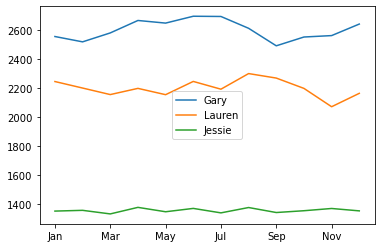

In [336]:
calsmonth[['Gary','Lauren','Jessie']].plot()

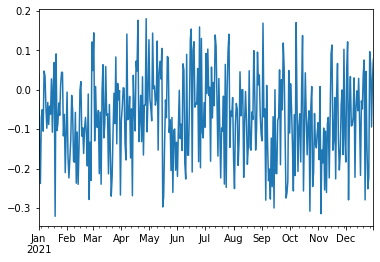

In [342]:
cals['Garychange'].plot()

In [347]:
xmean=[]
ymean=[]
zmean=[]
xmin=[]
ymin=[]
zmin=[]
xmax=[]
ymax=[]
zmax=[]
for i in range (1,13):
    xmean.append(round(cals.Gary[cals.Month==i].mean(),1))
    ymean.append(round(cals.Lauren[cals.Month==i].mean(),1))
    zmean.append(round(cals.Jessie[cals.Month==i].mean(),1))
    xmin.append(round(cals.Garyburned[cals.Month==i].min(),1)) 
    ymin.append(round(cals.Laurenburned[cals.Month==i].min(),1)) 
    zmin.append(round(cals.Jessieburned[cals.Month==i].min(),1))
    xmax.append(round(cals.Garyburned[cals.Month==i].max(),1))
    ymax.append(round(cals.Laurenburned[cals.Month==i].max(),1)) 
    zmax.append(round(cals.Jessieburned[cals.Month==i].max(),1)) 
calsmonth=pd.DataFrame({'Garymean':xmean,'Garymin':xmin,'Garymax':xmax,'Laurenmean':ymean,'Laurenmin':ymin,'Laurenmax':ymax,
                        'Jessiemean':zmean, 'Jessiemin':zmin,'Jessiemax':zmax})
calsmonth.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
calsmonth

,Garymean,Garymin,Garymax,Laurenmean,Laurenmin,Laurenmax,Jessiemean,Jessiemin,Jessiemax
Jan,2555.3,2409,3288,2244.7,1903,2664,1350.8,1100,1554
Feb,2518.5,2511,3290,2199.8,1915,2634,1356.0,1104,1599
Mar,2580.1,2432,3297,2154.7,1925,2667,1331.3,1105,1594
Apr,2666.0,2408,3225,2197.5,1905,2658,1376.5,1112,1591
May,2647.9,2411,3276,2154.0,1935,2673,1346.2,1101,1597
Jun,2695.2,2449,3274,2245.4,1950,2651,1369.3,1100,1597
Jul,2693.6,2411,3298,2191.9,1933,2671,1338.5,1190,1596
Aug,2612.0,2416,3290,2299.6,1907,2639,1375.4,1142,1589
Sep,2491.2,2406,3258,2268.6,1913,2642,1340.9,1113,1580
Oct,2551.9,2421,3283,2197.4,1905,2673,1353.3,1101,1589


In [350]:
#withtout bothering with dataframes. if you just wanted the average calories consudmed by Gary in April
cals.Gary[cals.Month==4].mean()

2665.9666666666667

In [352]:
#average weight loss for Jessie between April and May
cals.Jessie[(cals.Month==4) | (cals.Month ==5)].mean()

1361.0983606557377